In [1]:
!pwd

/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi


In [2]:
# /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/

In [3]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [4]:
def denormalize_boxes(parts, img_width, img_height):
    """
    Denormalize bounding boxes from normalized coordinates to image coordinates.

    Args:
        boxes (list): List of boxes in YOLO format (class_index, x_center, y_center, width, height).
        img_width (int): Width of the image.
        img_height (int): Height of the image.

    Returns:
        list: List of denormalized boxes.
    """
    class_index, x_center, y_center, width, height = map(float, parts)
    print('denormalize_boxes parts: ', class_index, x_center, y_center, width, height)
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)
    
    return [x_min, y_min, x_max, y_max, int(class_index)]

In [5]:
def create_folder_if_not_exists(folder_path):
    """
    Create a folder if it doesn't exist already.

    Args:
        folder_path (str): Path to the folder to be created.
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

In [16]:
def finding_files(path):
    os.chdir(path)
    print('입력된 path: ', os.getcwd())
    
    folders = os.listdir()
    for folder in folders:
        print('folder name: ', folder)
        change_path = os.path.join(path, folder)
        os.chdir(change_path)
        
        jpg_files = [value for value in os.listdir() if "txt" not in value]
        for i in range(int(len(os.listdir())/2)):
            img_path = os.path.join(change_path, jpg_files[i])
            file_name = img_path.rsplit('.', 1)[0]
            txt_path = file_name+'.txt'
            print('txt_path_name: ', txt_path)
            img_txt_open_crop(path, folder, file_name, img_path, txt_path)

In [7]:
def load_label_by_index(food_index_file, index):
    """
    Load label by index from a text file.

    Args:
        filename (str): Path to the text file containing labels.
        index (int): Index of the label to retrieve.

    Returns:
        str: Label corresponding to the given index.
    """
    with open(food_index_file, 'r') as file:
        for line in file:
            idx, label = line.strip().split(':')
            if int(idx) == index:
                return label.strip()
    return None

In [8]:
def save_img(path, folder, file_name, num, img, class_name):
    # 이미지 저장하기(jpeg)    
    save_path = os.path.join('/'.join(path.split('/')[:-1]), 'crop_multi_500')
    create_folder_if_not_exists(save_path)
    
    save_folder_path = os.path.join(save_path, folder)
    create_folder_if_not_exists(save_folder_path)
    
    
    img = img.convert('RGB')
    img.save(f'{save_path}/{folder}/{file_name.split("/")[-1]}_{class_name}_{num}.jpg')

In [19]:
def img_txt_open_crop(path, folder, file_name, img_path, txt_path):
    img = Image.open(img_path)
    img_width = img.size[0]
    img_height = img.size[1]
    print('img size: ', img_width, ',', img_height)
    
    with open(txt_path, 'r') as file:
        lines = file.readlines()
        for num , line in enumerate(lines):
            # 각 줄에서 좌표와 레이블 파싱
            parts = line.strip().split(',')
            print('parts: ', parts)
                
            # width, height, lefttop_x, lefttop_y , bbox_w, bbox_h , 음식이름
            if parts[0].strip():
                if len(parts) >= 7:
                    x1, y1, x2, y2 = map(int, parts[2:6])
                    class_name = parts[6]
                    crop_img = img.crop((x1, y1, x1+x2, y1+y2))

                # class_index, 정규화된 x_center, y_center, width, height이다. 
                else:
                    x1, y1, x2, y2, class_num = denormalize_boxes(parts[0].split(), img_width, img_height)
                    print('x1, y1, x2, y2, class_num: ', x1, y1, x2, y2, class_num)
                    crop_img = img.crop((x1, y1, x2, y2))
                    food_index_file = os.path.join('/'.join(path.split('/')[:-1]), 'unpacked_food_dict.txt')
                    print('food_index_file: ', food_index_file)
                    class_name = load_label_by_index(food_index_file, class_num)
                    print('class_name: ', class_name)
            else:
                pass
            save_img(path, folder, file_name, num, crop_img, class_name)

In [20]:
finding_files('/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500')

입력된 path:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500
folder name:  101_맛탕_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/101_맛탕_multi/dki_10054964.txt
img size:  602 , 400
parts:  ['602', ' 400', ' 95', ' 135', ' 382', ' 254', ' 맛탕']
parts:  ['602', ' 400', ' 409', ' 3', ' 83', ' 107', ' 체리']
folder name:  102_망고_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/102_망고_multi/dki_10056189.txt
img size:  275 , 183
parts:  ['275', ' 183', ' 52', ' 10', ' 144', ' 128', ' 브로콜리']
parts:  ['275', ' 183', ' 113', ' 125', ' 106', ' 57', ' 패션후르츠']
parts:  ['275', ' 183', ' 193', ' 12', ' 75', ' 135', ' 망고']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/102_망고_multi/dki_10056366.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 335', ' 137', ' 198', ' 189', ' 망고']
parts:  

parts:  ['1024', ' 689', ' 14', ' 447', ' 136', ' 194', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/105_매운탕_multi/Img_137_0251.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 124', ' 134', ' 297', ' 140', ' 매운탕']
parts:  ['533', ' 400', ' 0', ' 193', ' 99', ' 91', ' 깍두기']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/105_매운탕_multi/Img_137_0420.txt
img size:  601 , 400
parts:  ['601', ' 400', ' 25', ' 62', ' 405', ' 302', ' 매운탕']
parts:  ['601', ' 400', ' 452', ' 77', ' 147', ' 98', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/105_매운탕_multi/Img_137_0525.txt
img size:  600 , 400
parts:  ['600', ' 400', ' 0', ' 121', ' 170', ' 70', ' 쌀밥']
parts:  ['600', ' 400', ' 227', ' 125', ' 307', ' 145', ' 매운탕']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/

parts:  ['850', ' 566', ' 318', ' 0', ' 527', ' 554', ' 계란']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/114_무생채_multi/Img_032_0306.txt
img size:  900 , 601
parts:  ['900', ' 601', ' 231', ' 169', ' 413', ' 319', ' 무생채']
parts:  ['900', ' 601', ' 714', ' 113', ' 186', ' 233', ' 깍두기']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/114_무생채_multi/Img_032_0374.txt
img size:  601 , 400
parts:  ['601', ' 400', ' 164', ' 179', ' 176', ' 127', ' 무생채']
parts:  ['601', ' 400', ' 327', ' 66', ' 132', ' 60', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/114_무생채_multi/Img_032_0459.txt
img size:  267 , 400
parts:  ['267', ' 400', ' 6', ' 167', ' 211', ' 148', ' 무생채']
parts:  ['267', ' 400', ' 48', ' 37', ' 137', ' 48', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/mu

parts:  ['143 0.475000 0.746000 0.738000 0.464000']
denormalize_boxes parts:  143.0 0.475 0.746 0.738 0.464
x1, y1, x2, y2, class_num:  53 257 422 489 143
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  비빔냉면
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi/kfood_283_30000123.txt
img size:  580 , 435
parts:  ['119 0.778448 0.377011 0.443103 0.675862']
denormalize_boxes parts:  119.0 0.778448 0.377011 0.443103 0.675862
x1, y1, x2, y2, class_num:  322 16 579 310 119
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  물냉면
parts:  ['143 0.244828 0.456322 0.486207 0.627586']
denormalize_boxes parts:  143.0 0.244828 0.456322 0.486207 0.627586
x1, y1, x2, y2, class_num:  1 62 283 335 143
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_foo

class_name:  물냉면
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi/kfood_283_30000373.txt
img size:  533 , 400
parts:  ['119 0.372420 0.548750 0.538462 0.572500']
denormalize_boxes parts:  119.0 0.37242 0.54875 0.538462 0.5725
x1, y1, x2, y2, class_num:  54 104 341 334 119
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  물냉면
parts:  ['839 0.812383 0.605000 0.198874 0.255000']
denormalize_boxes parts:  839.0 0.812383 0.605 0.198874 0.255
x1, y1, x2, y2, class_num:  380 191 486 293 839
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi/kfood_283_30000379.txt
img size:  600 , 400
parts:  ['119 0.488333 0.562500 0.613333 0.745000']
denormali

parts:  ['108 0.135021 0.140000 0.210970 0.275000']
denormalize_boxes parts:  108.0 0.135021 0.14 0.21097 0.275
x1, y1, x2, y2, class_num:  21 1 170 111 108
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  멸치볶음
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/120_물회_multi/kfood_284_30000225.txt
img size:  225 , 400
parts:  ['120 0.502222 0.503750 0.995556 0.607500']
denormalize_boxes parts:  120.0 0.502222 0.50375 0.995556 0.6075
x1, y1, x2, y2, class_num:  0 79 225 323 120
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  물회
parts:  ['448 0.342222 0.025000 0.462222 0.045000']
denormalize_boxes parts:  448.0 0.342222 0.025 0.462222 0.045
x1, y1, x2, y2, class_num:  24 1 128 19 448
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/

img size:  465 , 400
parts:  ['465', ' 400', ' 29', ' 16', ' 412', ' 372', ' 미나리강회']
parts:  ['465', ' 400', ' 161', ' 109', ' 152', ' 138', ' 고추장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/121_미나리강회_multi/dki_10063719.txt
img size:  534 , 400
parts:  ['534', ' 400', ' 239', ' 76', ' 251', ' 244', ' 미나리강회']
parts:  ['534', ' 400', ' 16', ' 138', ' 169', ' 136', ' 고추장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/121_미나리강회_multi/dki_10063726.txt
img size:  300 , 168
parts:  ['300', ' 168', ' 36', ' 28', ' 130', ' 116', ' 미나리강회']
parts:  ['300', ' 168', ' 198', ' 37', ' 84', ' 69', ' 갈비찜']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/121_미나리강회_multi/dki_10063813.txt
img size:  194 , 259
parts:  ['194', ' 259', ' 7', ' 87', ' 105', ' 106', ' 미나리강회']
parts:  ['194', ' 259', ' 119', ' 146', ' 65', ' 82', ' 탕평채']

parts:  ['2048', ' 1152', ' 0', ' 47', ' 493', ' 419', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/122_미역국_multi/Img_017_0477.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 11', ' 67', ' 370', ' 285', ' 미역국']
parts:  ['533', ' 400', ' 424', ' 64', ' 109', ' 218', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/122_미역국_multi/Img_017_0500.txt
img size:  599 , 400
parts:  ['599', ' 400', ' 102', ' 53', ' 432', ' 258', ' 미역국']
parts:  ['599', ' 400', ' 0', ' 67', ' 55', ' 186', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/122_미역국_multi/Img_017_0551.txt
img size:  598 , 400
parts:  ['598', ' 400', ' 285', ' 134', ' 259', ' 214', ' 미역국']
parts:  ['598', ' 400', ' 16', ' 136', ' 205', ' 173', ' 잡곡밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/mul

class_name:  생선회
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/126_바다가재(랍스터)_multi/dki_식신_바다가재(랍스터)_700006.txt
img size:  640 , 640
parts:  ['126 0.739062 0.546094 0.521875 0.689063']
denormalize_boxes parts:  126.0 0.739062 0.546094 0.521875 0.689063
x1, y1, x2, y2, class_num:  305 129 639 570 126
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  바다가재(랍스터)
parts:  ['148 0.217969 0.629687 0.414062 0.693750']
denormalize_boxes parts:  148.0 0.217969 0.629687 0.414062 0.69375
x1, y1, x2, y2, class_num:  7 180 272 624 148
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  새우
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/126_바다가재(랍스터)_multi/dki_식신_바다가재(랍스터)_700008.txt
img size:  640 , 640
parts:  ['126 0.503125 0.66

img size:  449 , 400
parts:  ['449', ' 400', ' 0', ' 88', ' 303', ' 250', ' 배추김치']
parts:  ['449', ' 400', ' 348', ' 114', ' 101', ' 179', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/130_배추김치_multi/Img_033_0863.txt
img size:  601 , 400
parts:  ['601', ' 400', ' 62', ' 158', ' 246', ' 195', ' 배추김치']
parts:  ['601', ' 400', ' 339', ' 104', ' 248', ' 156', ' 총각김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/130_배추김치_multi/Img_033_0865.txt
img size:  613 , 400
parts:  ['613', ' 400', ' 21', ' 54', ' 338', ' 292', ' 배추김치']
parts:  ['613', ' 400', ' 386', ' 94', ' 217', ' 228', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/130_배추김치_multi/Img_033_0893.txt
img size:  600 , 400
parts:  ['600', ' 400', ' 53', ' 122', ' 251', ' 157', ' 배추김치']
parts:  ['600', ' 400', ' 324', ' 208', ' 206', ' 190', ' 갓김치']
p

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/130_배추김치_multi/dki_10143706.txt
img size:  640 , 426
parts:  ['640', ' 426', ' 0', ' 1', ' 119', ' 125', ' 배추김치']
parts:  ['640', ' 426', ' 161', ' 38', ' 412', ' 277', ' 삼계탕']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/130_배추김치_multi/1458007252040604.txt
img size:  540 , 503
parts:  ['540', ' 503', ' 0', ' 244', ' 166', ' 219', ' 배추김치']
parts:  ['540', ' 503', ' 15', ' 35', ' 223', ' 152', ' 열무김치']
parts:  ['540', ' 503', ' 220', ' 115', ' 320', ' 308', ' 해물탕']
folder name:  131_배추전_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/131_배추전_multi/dki_10068246.txt
img size:  712 , 400
parts:  ['712', ' 400', ' 53', ' 25', ' 465', ' 228', ' 배추전']
parts:  ['712', ' 400', ' 409', ' 247', ' 144', ' 145', ' 양념간장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_det

parts:  ['340', ' 222', ' 230', ' 86', ' 94', ' 89', ' 양념간장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/139_부추전_multi/dki_10071945.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 0', ' 23', ' 348', ' 344', ' 부추전']
parts:  ['533', ' 400', ' 398', ' 211', ' 124', ' 128', ' 고추']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/139_부추전_multi/dki_10072016.txt
img size:  601 , 400
parts:  ['601', ' 400', ' 155', ' 105', ' 411', ' 288', ' 부추전']
parts:  ['601', ' 400', ' 80', ' 7', ' 138', ' 83', ' 양념간장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/139_부추전_multi/dki_10071727.txt
img size:  352 , 251
parts:  ['139 0.488636 0.490040 0.806818 0.956175']
denormalize_boxes parts:  139.0 0.488636 0.49004 0.806818 0.956175
x1, y1, x2, y2, class_num:  29 3 313 243 139
food_index_file:  /data_180/Food_Detection/Dataset/food_d

parts:  ['773', ' 579', ' 55', ' 0', ' 376', ' 84', ' 물냉면']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/143_비빔냉면_multi/Img_053_0709.txt
img size:  300 , 400
parts:  ['300', ' 400', ' 4', ' 70', ' 253', ' 239', ' 비빔냉면']
parts:  ['300', ' 400', ' 146', ' 318', ' 154', ' 82', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/143_비빔냉면_multi/kfood_285_30000071.txt
img size:  1024 , 1365
parts:  ['143 0.502930 0.630769 0.761719 0.512821']
denormalize_boxes parts:  143.0 0.50293 0.630769 0.761719 0.512821
x1, y1, x2, y2, class_num:  125 510 905 1211 143
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  비빔냉면
parts:  ['75 0.426758 0.191209 0.626953 0.257875']
denormalize_boxes parts:  75.0 0.426758 0.191209 0.626953 0.257875
x1, y1, x2, y2, class_num:  116 85 758 436 75
food_index_file:  /data

img size:  1080 , 1080
parts:  ['1080', ' 1080', ' 251', ' 359', ' 619', ' 485', ' 비빔냉면']
parts:  ['1080', ' 1080', ' 1', ' 207', ' 198', ' 223', ' 열무김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/143_비빔냉면_multi/kfood_285_30000029.txt
img size:  500 , 375
parts:  ['500', ' 375', ' 178', ' 63', ' 320', ' 308', ' 비빔냉면']
parts:  ['500', ' 375', ' 1', ' 46', ' 121', ' 294', ' 전통떡갈비']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/143_비빔냉면_multi/kfood_285_30000110.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 160', ' 90', ' 236', ' 240', ' 비빔냉면']
parts:  ['533', ' 400', ' 0', ' 128', ' 65', ' 198', ' 갈비구이']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/143_비빔냉면_multi/kfood_285_30000012.txt
img size:  540 , 403
parts:  ['143 0.354630 0.797767 0.220370 0.156328']
denormalize_boxes parts:  143.0 0.35463 0.797767 0.

parts:  ['280 0.413325 0.183074 0.824062 0.362694']
denormalize_boxes parts:  280.0 0.413325 0.183074 0.824062 0.362694
x1, y1, x2, y2, class_num:  1 0 638 210 280
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  떡볶이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/143_비빔냉면_multi/kfood_285_30000056.txt
img size:  700 , 641
parts:  ['143 0.724286 0.400156 0.460000 0.457098']
denormalize_boxes parts:  143.0 0.724286 0.400156 0.46 0.457098
x1, y1, x2, y2, class_num:  346 110 668 402 143
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  비빔냉면
parts:  ['75 0.210714 0.471139 0.298571 0.355694']
denormalize_boxes parts:  75.0 0.210714 0.471139 0.298571 0.355694
x1, y1, x2, y2, class_num:  42 188 251 416 75
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/origin

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  비빔냉면
parts:  ['176 0.132000 0.127000 0.260000 0.138000']
denormalize_boxes parts:  176.0 0.132 0.127 0.26 0.138
x1, y1, x2, y2, class_num:  1 29 131 98 176
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  열무김치
folder name:  145_사과_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/145_사과_multi/dki_10074797.txt
img size:  318 , 159
parts:  ['318', ' 159', ' 145', ' 24', ' 106', ' 88', ' 사과']
parts:  ['318', ' 159', ' 101', ' 117', ' 54', ' 41', ' 아몬드']
folder name:  146_삼계탕_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/146_삼계탕_multi/Img_138_0053.txt
img size:  500 , 500
parts:  ['500', ' 500', ' 18', ' 127', ' 376', ' 351', ' 삼계탕']
parts:  ['500', ' 500',

parts:  ['259', ' 194', ' 145', ' 46', ' 97', ' 88', ' 순두부찌개']
folder name:  148_새우_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/148_새우_multi/dki_10075499.txt
img size:  700 , 1050
parts:  ['700', ' 1050', ' 355', ' 0', ' 343', ' 228', ' 새우']
parts:  ['700', ' 1050', ' 142', ' 307', ' 480', ' 437', ' 파스타']
folder name:  149_새우튀김_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/149_새우튀김_multi/dki_10168017.txt
img size:  360 , 480
parts:  ['360', ' 480', ' 12', ' 138', ' 344', ' 276', ' 새우튀김']
parts:  ['360', ' 480', ' 260', ' 8', ' 100', ' 98', ' 된장국']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/149_새우튀김_multi/dki_10168021.txt
img size:  600 , 449
parts:  ['600', ' 449', ' 0', ' 251', ' 144', ' 195', ' 쌀밥']
parts:  ['600', ' 449', ' 131', ' 28', ' 363', ' 250', ' 새우튀김']
txt_path_name:  /data_180/Food_Det

class_name:  새우튀김
parts:  ['260 0.316011 0.442500 0.455056 0.805000']
denormalize_boxes parts:  260.0 0.316011 0.4425 0.455056 0.805
x1, y1, x2, y2, class_num:  62 16 386 338 260
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  비빔밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/149_새우튀김_multi/kfood_264_30000834.txt
img size:  519 , 400
parts:  ['149 0.785164 0.497500 0.429672 0.520000']
denormalize_boxes parts:  149.0 0.785164 0.4975 0.429672 0.52
x1, y1, x2, y2, class_num:  296 95 519 303 149
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  새우튀김
parts:  ['280 0.229287 0.512500 0.439306 0.475000']
denormalize_boxes parts:  280.0 0.229287 0.5125 0.439306 0.475
x1, y1, x2, y2, class_num:  5 109 232 300 280
food_index_file:  /data_180/Food_Detection/Dataset/food_detecti

parts:  ['600', ' 900', ' 321', ' 651', ' 185', ' 171', ' 수정과']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/162_약식_multi/dki_10145124.txt
img size:  640 , 942
parts:  ['640', ' 942', ' 74', ' 351', ' 494', ' 497', ' 약식']
parts:  ['640', ' 942', ' 67', ' 44', ' 125', ' 81', ' 수정과']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/162_약식_multi/dki_10145298.txt
img size:  480 , 480
parts:  ['480', ' 480', ' 132', ' 87', ' 128', ' 91', ' 식혜']
parts:  ['480', ' 480', ' 92', ' 203', ' 136', ' 125', ' 감']
parts:  ['480', ' 480', ' 277', ' 149', ' 137', ' 125', ' 약식']
parts:  ['480', ' 480', ' 230', ' 287', ' 130', ' 107', ' 사과']
folder name:  163_양념게장_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/163_양념게장_multi/dki_식신_양념게장_700007.txt
img size:  534 , 401
parts:  ['534', ' 401', ' 307', ' 107', ' 225', ' 290', ' 양념게장'

parts:  ['533', ' 400', ' 1', ' 0', ' 220', ' 144', ' 찐고구마']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/171_연근튀김_multi/dki_10083266.txt
img size:  266 , 400
parts:  ['266', ' 400', ' 65', ' 63', ' 161', ' 163', ' 연근튀김']
parts:  ['266', ' 400', ' 80', ' 269', ' 84', ' 87', ' 양념간장']
folder name:  173_연어덮밥_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/173_연어덮밥_multi/dki_10084109.txt
img size:  711 , 400
parts:  ['711', ' 400', ' 126', ' 53', ' 249', ' 250', ' 연어덮밥']
parts:  ['711', ' 400', ' 442', ' 194', ' 177', ' 178', ' 어묵국']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/173_연어덮밥_multi/dki_10084111.txt
img size:  711 , 400
parts:  ['711', ' 400', ' 170', ' 92', ' 297', ' 258', ' 연어덮밥']
parts:  ['711', ' 400', ' 507', ' 137', ' 177', ' 131', ' 된장국']
txt_path_name:  /data_180/Food_Detection/Dataset/food_dete

parts:  ['640', ' 640', ' 16', ' 309', ' 149', ' 77', ' 무말랭이무침']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/198_장어양념구이_multi/dki_10095301.txt
img size:  225 , 225
parts:  ['198 0.386667 0.480000 0.737778 0.631111']
denormalize_boxes parts:  198.0 0.386667 0.48 0.737778 0.631111
x1, y1, x2, y2, class_num:  4 37 170 178 198
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  장어양념구이
parts:  ['714 0.762222 0.517778 0.386667 0.680000']
denormalize_boxes parts:  714.0 0.762222 0.517778 0.386667 0.68
x1, y1, x2, y2, class_num:  127 40 214 193 714
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  장어구이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/198_장어양념구이_multi/dki_10095306.txt
img size:  266 , 253
parts:  ['198 0.5

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['413 0.595588 0.231250 0.308824 0.457500']
denormalize_boxes parts:  413.0 0.595588 0.23125 0.308824 0.4575
x1, y1, x2, y2, class_num:  269 1 459 184 413
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  야채쌈
parts:  ['705 0.846405 0.550000 0.218954 0.320000']
denormalize_boxes parts:  705.0 0.846405 0.55 0.218954 0.32
x1, y1, x2, y2, class_num:  450 156 584 284 705
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  양파장아찌
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/198_장어양념구이_multi/dki_10095780.txt
img size:  275 , 183
parts:  ['198 0.501818 0.494536 0.996364 0.606557']
denormalize_boxes parts:  198.0 0.501818 0.494536 0.996

class_name:  장어구이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/198_장어양념구이_multi/dki_식신_장어양념구이1_장어구이2_10095513.txt
img size:  259 , 194
parts:  ['198 0.505792 0.188144 0.803089 0.242268']
denormalize_boxes parts:  198.0 0.505792 0.188144 0.803089 0.242268
x1, y1, x2, y2, class_num:  27 12 235 59 198
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  장어양념구이
parts:  ['198 0.498069 0.731959 0.949807 0.298969']
denormalize_boxes parts:  198.0 0.498069 0.731959 0.949807 0.298969
x1, y1, x2, y2, class_num:  5 113 251 171 198
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  장어양념구이
parts:  ['714 0.488417 0.451031 0.907336 0.283505']
denormalize_boxes parts:  714.0 0.488417 0.451031 0.907336 0.283505
x1, y1, x2, y2, class_num:  8 60 244 114 714
food_index_file:  /data_180/Food

parts:  ['500', ' 375', ' 351', ' 55', ' 83', ' 68', ' 단무지']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/209_짬뽕_multi/dki_10155603.txt
img size:  500 , 375
parts:  ['500', ' 375', ' 33', ' 114', ' 446', ' 258', ' 짬뽕']
parts:  ['500', ' 375', ' 84', ' 4', ' 292', ' 99', ' 탕수육']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/209_짬뽕_multi/1358988626817235.txt
img size:  475 , 319
parts:  ['475', ' 319', ' 60', ' 53', ' 337', ' 233', ' 짬뽕']
parts:  ['475', ' 319', ' 413', ' 218', ' 62', ' 99', ' 단무지']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/209_짬뽕_multi/1447171880153062.txt
img size:  640 , 640
parts:  ['640', ' 640', ' 89', ' 189', ' 474', ' 334', ' 짬뽕']
parts:  ['640', ' 640', ' 0', ' 96', ' 73', ' 183', ' 탕수육']
parts:  ['640', ' 640', ' 296', ' 75', ' 277', ' 64', ' 짜장면']
txt_path_name:  /data_180/Food_Detect

parts:  ['3264', ' 2448', ' 779', ' 99', ' 1122', ' 500', ' 배추김치']
parts:  ['3264', ' 2448', ' 2164', ' 265', ' 1100', ' 708', ' 고추']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/223_콩국수_multi/dki_10157574.txt
img size:  657 , 487
parts:  ['657', ' 487', ' 86', ' 74', ' 463', ' 389', ' 콩국수']
parts:  ['657', ' 487', ' 0', ' 27', ' 132', ' 161', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/223_콩국수_multi/dki_10157585.txt
img size:  740 , 493
parts:  ['740', ' 493', ' 25', ' 64', ' 317', ' 281', ' 콩국수']
parts:  ['740', ' 493', ' 419', ' 99', ' 218', ' 228', ' 배추김치']
folder name:  224_콩나물국_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/224_콩나물국_multi/dki_10158488.txt
img size:  900 , 600
parts:  ['900', ' 600', ' 440', ' 276', ' 211', ' 147', ' 콩나물국']
parts:  ['900', ' 600', ' 228', ' 110', ' 133', ' 81'

img size:  596 , 594
parts:  ['596', ' 594', ' 238', ' 522', ' 243', ' 71', ' 쌀밥']
parts:  ['596', ' 594', ' 161', ' 235', ' 279', ' 185', ' 해물탕']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/247_해물탕_multi/dki_10063121.txt
img size:  225 , 225
parts:  ['225', ' 225', ' 7', ' 12', ' 212', ' 204', ' 해물탕']
parts:  ['225', ' 225', ' 21', ' 58', ' 163', ' 156', ' 문어']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/247_해물탕_multi/dki_10063342.txt
img size:  275 , 183
parts:  ['275', ' 183', ' 19', ' 12', ' 242', ' 161', ' 해물탕']
parts:  ['275', ' 183', ' 39', ' 104', ' 77', ' 69', ' 문어']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/247_해물탕_multi/dki_10063162.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 85', ' 7', ' 389', ' 338', ' 해물탕']
parts:  ['533', ' 400', ' 152', ' 10', ' 313', ' 330', ' 문어']
txt_path_name:  /d

parts:  ['4032', ' 3024', ' 1564', ' 310', ' 1281', ' 535', ' 시래기된장국']
folder name:  25_굴무생채_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/25_굴무생채_multi/dki_25_00326.txt
img size:  706 , 400
parts:  ['706', ' 400', ' 272', ' 16', ' 326', ' 325', ' 굴무생채']
parts:  ['706', ' 400', ' 0', ' 1', ' 148', ' 203', ' 느타리버섯볶음']
folder name:  260_비빔밥_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/260_비빔밥_multi/kfood_260_30000037.txt
img size:  320 , 240
parts:  ['320', ' 240', ' 286', ' 60', ' 34', ' 116', ' 된장국']
parts:  ['320', ' 240', ' 0', ' 31', ' 236', ' 180', ' 비빔밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/260_비빔밥_multi/kfood_260_30000151.txt
img size:  640 , 480
parts:  ['640', ' 480', ' 131', ' 108', ' 381', ' 266', ' 비빔밥']
parts:  ['640', ' 480', ' 616', ' 262', ' 24', ' 162', ' 고추장', ' 초고추장']
txt_pa

parts:  ['600', ' 337', ' 23', ' 63', ' 320', ' 249', ' 카이센동(스시동)']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/262_된장국_multi/kfood_262_30000553.txt
img size:  600 , 450
parts:  ['600', ' 450', ' 225', ' 67', ' 346', ' 339', ' 카이센동(스시동)']
parts:  ['600', ' 450', ' 21', ' 100', ' 228', ' 256', ' 된장국']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/262_된장국_multi/kfood_262_30000557.txt
img size:  600 , 450
parts:  ['600', ' 450', ' 3', ' 111', ' 231', ' 229', ' 된장국']
parts:  ['600', ' 450', ' 215', ' 85', ' 379', ' 336', ' 카이센동(스시동)']
folder name:  263_만두_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/263_만두_multi/kfood_263_30000945.txt
img size:  534 , 400
parts:  ['263 0.294944 0.570000 0.458801 0.680000']
denormalize_boxes parts:  263.0 0.294944 0.57 0.458801 0.68
x1, y1, x2, y2, class_num:  35 91 279 364 263

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  유부초밥
parts:  ['290 0.843173 0.195820 0.276753 0.224458']
denormalize_boxes parts:  290.0 0.843173 0.19582 0.276753 0.224458
x1, y1, x2, y2, class_num:  381 53 531 198 290
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  유부초밥
parts:  ['239 0.456642 0.233746 0.215867 0.114551']
denormalize_boxes parts:  239.0 0.456642 0.233746 0.215867 0.114551
x1, y1, x2, y2, class_num:  189 113 305 187 239
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  포도
parts:  ['128 0.615314 0.230650 0.167897 0.120743']
denormalize_boxes parts:  128.0 0.615314 0.23065 0.167897 0.120743
x1, y1, x2, y2, class_num:  288 109 379 187 128
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
parts:  ['280 0.709000 0.206667 0.510000 0.312000']
denormalize_boxes parts:  280.0 0.709 0.206667 0.51 0.312
x1, y1, x2, y2, class_num:  227 19 482 136 280
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  떡볶이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/273_김밥_multi/kfood_273_30000123.txt
img size:  333 , 500
parts:  ['294 0.513514 0.258000 0.972973 0.476000']
denormalize_boxes parts:  294.0 0.513514 0.258 0.972973 0.476
x1, y1, x2, y2, class_num:  9 10 333 248 294
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  잡채
parts:  ['273 0.504505 0.750000 0.960961 0.480000']
denormalize_boxes parts:  273.0 0.504505 0.75 0.960961 0.48
x1, y

img size:  500 , 375
parts:  ['273 0.177000 0.298667 0.350000 0.506667']
denormalize_boxes parts:  273.0 0.177 0.298667 0.35 0.506667
x1, y1, x2, y2, class_num:  1 17 176 207 273
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
parts:  ['265 0.685000 0.477333 0.626000 0.821333']
denormalize_boxes parts:  265.0 0.685 0.477333 0.626 0.821333
x1, y1, x2, y2, class_num:  186 24 499 332 265
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  쌀국수
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/273_김밥_multi/kfood_273_30000162.txt
img size:  640 , 481
parts:  ['403 0.150000 0.322245 0.296875 0.336798']
denormalize_boxes parts:  403.0 0.15 0.322245 0.296875 0.336798
x1, y1, x2, y2, class_num:  1 73 191 235 403
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/o

x1, y1, x2, y2, class_num:  398 143 527 261 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['273 0.393996 0.307500 0.574109 0.445000']
denormalize_boxes parts:  273.0 0.393996 0.3075 0.574109 0.445
x1, y1, x2, y2, class_num:  56 34 362 212 273
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
parts:  ['273 0.432458 0.768750 0.714822 0.312500']
denormalize_boxes parts:  273.0 0.432458 0.76875 0.714822 0.3125
x1, y1, x2, y2, class_num:  40 245 421 370 273
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/273_김밥_multi/kfood_273_30000246.txt
img size:  599 , 400
parts:  ['454 0.384808 0.381250 0.362270 0.167500']
denorma

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
parts:  ['388 0.233583 0.677500 0.459662 0.645000']
denormalize_boxes parts:  388.0 0.233583 0.6775 0.459662 0.645
x1, y1, x2, y2, class_num:  1 142 246 400 388
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  오렌지
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/273_김밥_multi/kfood_273_30000351.txt
img size:  550 , 412
parts:  ['273 0.559091 0.236650 0.372727 0.463592']
denormalize_boxes parts:  273.0 0.559091 0.23665 0.372727 0.463592
x1, y1, x2, y2, class_num:  205 1 409 192 273
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
parts:  ['273 0.399091 0.719660 0.518182 0.560680']
denormalize_boxes parts:  273.0 0.399091 0.71966 0.5181

parts:  ['276 0.523452 0.637500 0.555347 0.680000']
denormalize_boxes parts:  276.0 0.523452 0.6375 0.555347 0.68
x1, y1, x2, y2, class_num:  130 118 426 391 276
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  누룽지
parts:  ['130 0.185741 0.217500 0.281426 0.300000']
denormalize_boxes parts:  130.0 0.185741 0.2175 0.281426 0.3
x1, y1, x2, y2, class_num:  23 27 173 147 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/276_누룽지_multi/kfood_276_30000438.txt
img size:  533 , 400
parts:  ['276 0.514071 0.636250 0.405253 0.562500']
denormalize_boxes parts:  276.0 0.514071 0.63625 0.405253 0.5625
x1, y1, x2, y2, class_num:  165 142 381 367 276
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  도토리묵
parts:  ['277 0.349324 0.615315 0.298649 0.290090']
denormalize_boxes parts:  277.0 0.349324 0.615315 0.298649 0.29009
x1, y1, x2, y2, class_num:  147 260 368 421 277
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  도토리묵
parts:  ['277 0.606757 0.276577 0.213514 0.189189']
denormalize_boxes parts:  277.0 0.606757 0.276577 0.213514 0.189189
x1, y1, x2, y2, class_num:  370 101 528 206 277
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  도토리묵
parts:  ['277 0.797297 0.572072 0.335135 0.282883']
denormalize_boxes parts:  277.0 0.797297 0.572072 0.335135 0.282883
x1, y1, x2, y2, class_num:  465 238 713 395 277
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detect

class_name:  도토리묵
parts:  ['724 0.139655 0.569948 0.272414 0.336788']
denormalize_boxes parts:  724.0 0.139655 0.569948 0.272414 0.336788
x1, y1, x2, y2, class_num:  1 154 159 285 724
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
folder name:  279_땅콩조림_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/279_땅콩조림_multi/kfood_279_30000192.txt
img size:  1056 , 400
parts:  ['1056', ' 400', ' 4', ' 65', ' 501', ' 271', ' 땅콩조림']
parts:  ['1056', ' 400', ' 521', ' 200', ' 244', ' 148', ' 도토리묵']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/279_땅콩조림_multi/kfood_279_30000007.txt
img size:  530 , 782
parts:  ['279 0.357547 0.384271 0.711321 0.303069']
denormalize_boxes parts:  279.0 0.357547 0.384271 0.711321 0.303069
x1, y1, x2, y2, class_num:  0 181 377 418 279
food_index_file:  /data_180/

parts:  ['554', ' 587', ' 196', ' 0', ' 297', ' 136', ' 김밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/280_떡볶이_multi/1479948880549647.txt
img size:  503 , 636
parts:  ['503', ' 636', ' 3', ' 218', ' 498', ' 414', ' 떡볶이']
parts:  ['503', ' 636', ' 154', ' 0', ' 347', ' 231', ' 김밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/280_떡볶이_multi/1515464402195519.txt
img size:  476 , 254
parts:  ['476', ' 254', ' 3', ' 3', ' 297', ' 246', ' 떡볶이']
parts:  ['476', ' 254', ' 336', ' 4', ' 140', ' 247', ' 김밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/280_떡볶이_multi/Img_082_0651.txt
img size:  600 , 400
parts:  ['280 0.542500 0.572500 0.915000 0.585000']
denormalize_boxes parts:  280.0 0.5425 0.5725 0.915 0.585
x1, y1, x2, y2, class_num:  51 112 600 346 280
food_index_file:  /data_180/Food_Detection/Dataset/food_detect

parts:  ['426 0.500000 0.266250 0.275459 0.232500']
denormalize_boxes parts:  426.0 0.5 0.26625 0.275459 0.2325
x1, y1, x2, y2, class_num:  217 60 381 153 426
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  계란
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/280_떡볶이_multi/Img_082_0849.txt
img size:  348 , 400
parts:  ['280 0.372126 0.515000 0.543103 0.630000']
denormalize_boxes parts:  280.0 0.372126 0.515 0.543103 0.63
x1, y1, x2, y2, class_num:  34 80 223 332 280
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  떡볶이
parts:  ['426 0.362069 0.273750 0.413793 0.182500']
denormalize_boxes parts:  426.0 0.362069 0.27375 0.413793 0.1825
x1, y1, x2, y2, class_num:  54 73 197 146 426
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/mu

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  떡볶이
parts:  ['711 0.674219 0.257031 0.651563 0.504687']
denormalize_boxes parts:  711.0 0.674219 0.257031 0.651563 0.504687
x1, y1, x2, y2, class_num:  223 3 640 325 711
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  야채튀김
folder name:  281_막국수_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/281_막국수_multi/Img_051_0274.txt
img size:  700 , 467
parts:  ['700', ' 467', ' 478', ' 189', ' 222', ' 219', ' 열무김치']
parts:  ['700', ' 467', ' 0', ' 130', ' 445', ' 332', ' 막국수']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/281_막국수_multi/kfood_281_30000147.txt
img size:  700 , 466
parts:  ['281 0.439286 0.186695 0.284286 0.248927']
denormalize_boxes parts:  281.0 0.43

class_name:  None
parts:  ['87 0.752778 0.319174 0.322222 0.158223']
denormalize_boxes parts:  87.0 0.752778 0.319174 0.322222 0.158223
x1, y1, x2, y2, class_num:  639 308 987 511 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/281_막국수_multi/dki_식신_막국수_700082.txt
img size:  1080 , 1080
parts:  ['836 0.568981 0.621759 0.845370 0.756481']
denormalize_boxes parts:  836.0 0.568981 0.621759 0.84537 0.756481
x1, y1, x2, y2, class_num:  157 262 1070 1079 836
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['422 0.810648 0.098611 0.378704 0.195370']
denormalize_boxes parts:  422.0 0.810648 0.098611 0.378704 0.19537
x1, y1, x2, y2, class_num:  670 1 1080 211 422
food_index_file:  /data_180/Food_Detection/Dat

parts:  ['273 0.114815 0.468293 0.140741 0.329756']
denormalize_boxes parts:  273.0 0.114815 0.468293 0.140741 0.329756
x1, y1, x2, y2, class_num:  48 311 200 649 273
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  김밥
parts:  ['87 0.483796 0.586341 0.167593 0.160000']
denormalize_boxes parts:  87.0 0.483796 0.586341 0.167593 0.16
x1, y1, x2, y2, class_num:  431 518 612 682 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
parts:  ['46 0.422685 0.358049 0.136111 0.113171']
denormalize_boxes parts:  46.0 0.422685 0.358049 0.136111 0.113171
x1, y1, x2, y2, class_num:  382 309 529 425 46
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  단무지
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_

parts:  ['130 0.650134 0.189000 0.528150 0.134000']
denormalize_boxes parts:  130.0 0.650134 0.189 0.52815 0.134
x1, y1, x2, y2, class_num:  144 61 340 128 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/288_수제비_multi/kfood_288_30000089.txt
img size:  225 , 300
parts:  ['288 0.515556 0.691667 0.755556 0.503333']
denormalize_boxes parts:  288.0 0.515556 0.691667 0.755556 0.503333
x1, y1, x2, y2, class_num:  31 132 201 283 288
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['176 0.222222 0.376667 0.391111 0.213333']
denormalize_boxes parts:  176.0 0.222222 0.376667 0.391111 0.213333
x1, y1, x2, y2, class_num:  5 81 93 145 176
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['130 0.779082 0.325000 0.182653 0.190741']
denormalize_boxes parts:  130.0 0.779082 0.325 0.182653 0.190741
x1, y1, x2, y2, class_num:  674 123 853 227 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/288_수제비_multi/kfood_288_30000143.txt
img size:  700 , 466
parts:  ['288 0.534286 0.488197 0.537143 0.521459']
denormalize_boxes parts:  288.0 0.534286 0.488197 0.537143 0.521459
x1, y1, x2, y2, class_num:  186 105 562 348 288
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['130 0.192143 0.119099 0.381429 0.229614']
denormalize_boxes parts:  130.0 0.192143 0.1

denormalize_boxes parts:  288.0 0.64507 0.664474 0.614085 0.637218
x1, y1, x2, y2, class_num:  239 184 675 523 288
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['288 0.212676 0.192669 0.287324 0.234962']
denormalize_boxes parts:  288.0 0.212676 0.192669 0.287324 0.234962
x1, y1, x2, y2, class_num:  48 40 252 164 288
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['87 0.540141 0.260338 0.204225 0.171053']
denormalize_boxes parts:  87.0 0.540141 0.260338 0.204225 0.171053
x1, y1, x2, y2, class_num:  311 92 455 183 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/288_수제비_multi/kfood_288_30000173.txt
img si

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['130 0.176111 0.414074 0.350000 0.164444']
denormalize_boxes parts:  130.0 0.176111 0.414074 0.35 0.164444
x1, y1, x2, y2, class_num:  0 448 315 669 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/288_수제비_multi/kfood_288_30000197.txt
img size:  740 , 493
parts:  ['288 0.493243 0.644016 0.356757 0.501014']
denormalize_boxes parts:  288.0 0.493243 0.644016 0.356757 0.501014
x1, y1, x2, y2, class_num:  232 193 496 440 288
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['176 0.298649 0.288032 0.175676 0.239351']
denormalize_boxes parts:  176.0 0.298649 0.2880

parts:  ['214 0.671875 0.171180 0.298295 0.234043']
denormalize_boxes parts:  214.0 0.671875 0.17118 0.298295 0.234043
x1, y1, x2, y2, class_num:  368 27 577 149 214
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  총각김치
parts:  ['15 0.265625 0.166344 0.269886 0.278530']
denormalize_boxes parts:  15.0 0.265625 0.166344 0.269886 0.27853
x1, y1, x2, y2, class_num:  92 13 281 157 15
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  고사리나물
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/288_수제비_multi/kfood_288_30000236.txt
img size:  320 , 320
parts:  ['130 0.834375 0.710938 0.331250 0.378125']
denormalize_boxes parts:  130.0 0.834375 0.710938 0.33125 0.378125
x1, y1, x2, y2, class_num:  214 167 320 288 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/or

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['288 0.459333 0.895204 0.585333 0.209591']
denormalize_boxes parts:  288.0 0.459333 0.895204 0.585333 0.209591
x1, y1, x2, y2, class_num:  124 444 563 562 288
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수제비
parts:  ['87 0.307333 0.663410 0.249333 0.264654']
denormalize_boxes parts:  87.0 0.307333 0.66341 0.249333 0.264654
x1, y1, x2, y2, class_num:  136 298 323 447 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
parts:  ['130 0.147333 0.547957 0.153333 0.214920']
denormalize_boxes parts:  130.0 0.147333 0.547957 0.153333 0.21492
x1, y1, x2, y2, class_num:  52 247 167 368 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/mult

folder name:  289_알밥_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/289_알밥_multi/dki_식신_알밥_700008.txt
img size:  877 , 628
parts:  ['877', ' 628', ' 1', ' 344', ' 152', ' 254', ' 김']
parts:  ['877', ' 628', ' 287', ' 133', ' 487', ' 407', '알밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/289_알밥_multi/kfood_289_30000003.txt
img size:  600 , 400
parts:  ['289 0.486667 0.498750 0.436667 0.422500']
denormalize_boxes parts:  289.0 0.486667 0.49875 0.436667 0.4225
x1, y1, x2, y2, class_num:  161 115 423 284 289
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  알밥
parts:  ['345 0.841667 0.402500 0.316667 0.355000']
denormalize_boxes parts:  345.0 0.841667 0.4025 0.316667 0.355
x1, y1, x2, y2, class_num:  410 90 600 232 345
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/ori

parts:  ['46 0.686357 0.067500 0.118143 0.125000']
denormalize_boxes parts:  46.0 0.686357 0.0675 0.118143 0.125
x1, y1, x2, y2, class_num:  445 2 529 52 46
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  단무지
parts:  ['130 0.818565 0.055000 0.112518 0.105000']
denormalize_boxes parts:  130.0 0.818565 0.055 0.112518 0.105
x1, y1, x2, y2, class_num:  541 1 621 43 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/289_알밥_multi/kfood_289_30000403.txt
img size:  599 , 400
parts:  ['289 0.439900 0.792500 0.278798 0.250000']
denormalize_boxes parts:  289.0 0.4399 0.7925 0.278798 0.25
x1, y1, x2, y2, class_num:  180 267 347 367 289
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/289_알밥_multi/kfood_289_30000683.txt
img size:  533 , 400
parts:  ['289 0.530957 0.603750 0.484053 0.537500']
denormalize_boxes parts:  289.0 0.530957 0.60375 0.484053 0.5375
x1, y1, x2, y2, class_num:  153 134 412 349 289
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  알밥
parts:  ['87 0.670732 0.190000 0.230769 0.240000']
denormalize_boxes parts:  87.0 0.670732 0.19 0.230769 0.24
x1, y1, x2, y2, class_num:  296 28 419 124 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
parts:  ['130 0.247655 0.131250 0.258912 0.242500']
denormalize_boxes parts:  130.0 0.247655 0.13125 0.258912 0.2425
x1, y1, x2, y2, class_num:  63 4 201 101 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detec

parts:  ['500', ' 373', ' 388', ' 188', ' 112', ' 110', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/292_잔치국수_multi/dki_292_300232.txt
img size:  500 , 373
parts:  ['500', ' 373', ' 154', ' 120', ' 339', ' 247', ' 잔치국수']
parts:  ['500', ' 373', ' 350', ' 2', ' 131', ' 84', ' 깍두기']
parts:  ['500', ' 373', ' 0', ' 13', ' 295', ' 203', ' 해물파전']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/292_잔치국수_multi/dki_292_300235.txt
img size:  375 , 500
parts:  ['375', ' 500', ' 1', ' 116', ' 372', ' 346', ' 잔치국수']
parts:  ['375', ' 500', ' 43', ' 20', ' 149', ' 75', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/292_잔치국수_multi/dki_292_300239.txt
img size:  500 , 500
parts:  ['500', ' 500', ' 180', ' 179', ' 316', ' 151', ' 잔치국수']
parts:  ['500', ' 500', ' 1', ' 42', ' 137', ' 78', ' 배추김치']
txt_path_name:  /da

class_name:  갈비찜
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/294_잡채_multi/kfood_294_30000626.txt
img size:  500 , 328
parts:  ['294 0.755000 0.542683 0.394000 0.567073']
denormalize_boxes parts:  294.0 0.755 0.542683 0.394 0.567073
x1, y1, x2, y2, class_num:  279 85 476 270 294
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  잡채
parts:  ['228 0.461000 0.211890 0.350000 0.344512']
denormalize_boxes parts:  228.0 0.461 0.21189 0.35 0.344512
x1, y1, x2, y2, class_num:  143 12 318 125 228
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  탕수육
parts:  ['280 0.241000 0.640244 0.390000 0.457317']
denormalize_boxes parts:  280.0 0.241 0.640244 0.39 0.457317
x1, y1, x2, y2, class_num:  23 135 218 285 280
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/origi

img size:  640 , 640
parts:  ['640', ' 640', ' 0', ' 0', ' 208', ' 186', ' 케일']
parts:  ['640', ' 640', ' 199', ' 0', ' 150', ' 81', ' 도라지나물']
parts:  ['640', ' 640', ' 238', ' 240', ' 402', ' 400', ' 주꾸미볶음']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/298_주꾸미볶음_multi/kfood_298_30000493.txt
img size:  712 , 400
parts:  ['712', ' 400', ' 542', ' 2', ' 169', ' 99', ' 콩나물무침']
parts:  ['712', ' 400', ' 168', ' 35', ' 434', ' 336', ' 주꾸미볶음']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/298_주꾸미볶음_multi/kfood_298_30000113.txt
img size:  600 , 400
parts:  ['298 0.327500 0.376250 0.365000 0.512500']
denormalize_boxes parts:  298.0 0.3275 0.37625 0.365 0.5125
x1, y1, x2, y2, class_num:  87 48 306 253 298
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  주꾸미볶음
parts:  ['293 0.613333 0.722500 0.18666

parts:  ['1080', ' 1349', ' 53', ' 0', ' 712', ' 397', ' 양념게장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/315_간장게장_multi/Img_093_0462.txt
img size:  480 , 640
parts:  ['480', ' 640', ' 3', ' 84', ' 459', ' 406', ' 간장게장']
parts:  ['480', ' 640', ' 376', ' 0', ' 102', ' 68', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/315_간장게장_multi/Img_093_0620.txt
img size:  518 , 394
parts:  ['518', ' 394', ' 23', ' 6', ' 369', ' 362', ' 간장게장']
parts:  ['518', ' 394', ' 463', ' 0', ' 55', ' 62', ' 배추김치']
parts:  ['518', ' 394', ' 474', ' 151', ' 44', ' 242', ' 된장찌개']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/315_간장게장_multi/Img_093_0764.txt
img size:  604 , 400
parts:  ['604', ' 400', ' 111', ' 36', ' 387', ' 303', ' 간장게장']
parts:  ['604', ' 400', ' 528', ' 1', ' 76', ' 78', ' 멸치볶음']
txt_path_name:  /data_180/Foo

parts:  ['700', ' 481', ' 412', ' 5', ' 288', ' 175', ' 배추김치']
parts:  ['700', ' 481', ' 10', ' 63', ' 212', ' 138', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0072.txt
img size:  1080 , 1080
parts:  ['318 0.482870 0.673611 0.856481 0.652778']
denormalize_boxes parts:  318.0 0.48287 0.673611 0.856481 0.652778
x1, y1, x2, y2, class_num:  58 374 983 1080 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['770 0.174537 0.187500 0.347222 0.373148']
denormalize_boxes parts:  770.0 0.174537 0.1875 0.347222 0.373148
x1, y1, x2, y2, class_num:  1 1 375 403 770
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['130 0.798611 0.163889 0.402778 0.312963']
denormalize_boxes parts:  130.0 0.798611 0.163889 0.402778

class_name:  곰탕_설렁탕
parts:  ['130 0.235784 0.141016 0.377254 0.261719']
denormalize_boxes parts:  130.0 0.235784 0.141016 0.377254 0.261719
x1, y1, x2, y2, class_num:  34 13 306 348 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0211.txt
img size:  966 , 644
parts:  ['318 0.506729 0.486801 0.522774 0.538820']
denormalize_boxes parts:  318.0 0.506729 0.486801 0.522774 0.53882
x1, y1, x2, y2, class_num:  237 139 742 486 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['321 0.551760 0.066770 0.186335 0.130435']
denormalize_boxes parts:  321.0 0.55176 0.06677 0.186335 0.130435
x1, y1, x2, y2, class_num:  443 0 622 84 321
food_index_file:  /data_180/Food_Detection/Datase

parts:  ['748 0.214167 0.468750 0.121667 0.182500']
denormalize_boxes parts:  748.0 0.214167 0.46875 0.121667 0.1825
x1, y1, x2, y2, class_num:  92 151 165 224 748
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['130 0.420833 0.205000 0.161667 0.225000']
denormalize_boxes parts:  130.0 0.420833 0.205 0.161667 0.225
x1, y1, x2, y2, class_num:  203 37 300 127 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['87 0.689167 0.180000 0.191667 0.290000']
denormalize_boxes parts:  87.0 0.689167 0.18 0.191667 0.29
x1, y1, x2, y2, class_num:  356 14 471 130 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰

parts:  ['130 0.420965 0.363750 0.153078 0.132500']
denormalize_boxes parts:  130.0 0.420965 0.36375 0.153078 0.1325
x1, y1, x2, y2, class_num:  207 119 298 172 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['87 0.614809 0.358750 0.168053 0.127500']
denormalize_boxes parts:  87.0 0.614809 0.35875 0.168053 0.1275
x1, y1, x2, y2, class_num:  319 118 420 169 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0339.txt
img size:  600 , 400
parts:  ['318 0.548333 0.512500 0.723333 0.785000']
denormalize_boxes parts:  318.0 0.548333 0.5125 0.723333 0.785
x1, y1, x2, y2, class_num:  111 47 545 362 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0373.txt
img size:  602 , 400
parts:  ['318 0.348007 0.642500 0.473422 0.605000']
denormalize_boxes parts:  318.0 0.348007 0.6425 0.473422 0.605
x1, y1, x2, y2, class_num:  67 136 352 378 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['130 0.616279 0.231250 0.186047 0.237500']
denormalize_boxes parts:  130.0 0.616279 0.23125 0.186047 0.2375
x1, y1, x2, y2, class_num:  314 45 427 140 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['87 0.882060 0.252500 0.215947 0.190000']
denormalize_boxes parts:  87.0 0.88206 0.2525 0.215947 0.19
x1, y1, x2, y2, class_num:  466 63 596 139 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_de

denormalize_boxes parts:  293.0 0.142724 0.58 0.255597 0.23
x1, y1, x2, y2, class_num:  8 185 145 278 293
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  잡곡밥
parts:  ['182 0.454291 0.226250 0.296642 0.167500']
denormalize_boxes parts:  182.0 0.454291 0.22625 0.296642 0.1675
x1, y1, x2, y2, class_num:  163 57 323 124 182
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  오이소박이
parts:  ['705 0.194963 0.343750 0.162313 0.097500']
denormalize_boxes parts:  705.0 0.194963 0.34375 0.162313 0.0975
x1, y1, x2, y2, class_num:  61 118 148 157 705
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  양파장아찌
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0429.txt
img size:  533 ,

class_name:  배추김치
parts:  ['770 0.899340 0.267500 0.135314 0.200000']
denormalize_boxes parts:  770.0 0.89934 0.2675 0.135314 0.2
x1, y1, x2, y2, class_num:  251 67 293 147 770
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0463.txt
img size:  504 , 400
parts:  ['318 0.564484 0.490000 0.644841 0.530000']
denormalize_boxes parts:  318.0 0.564484 0.49 0.644841 0.53
x1, y1, x2, y2, class_num:  122 90 446 302 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['259 0.226190 0.263750 0.285714 0.262500']
denormalize_boxes parts:  259.0 0.22619 0.26375 0.285714 0.2625
x1, y1, x2, y2, class_num:  41 53 185 158 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/o

parts:  ['130 0.092871 0.173750 0.181989 0.272500']
denormalize_boxes parts:  130.0 0.092871 0.17375 0.181989 0.2725
x1, y1, x2, y2, class_num:  1 14 98 124 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0499.txt
img size:  696 , 400
parts:  ['318 0.510057 0.530000 0.577586 0.820000']
denormalize_boxes parts:  318.0 0.510057 0.53 0.577586 0.82
x1, y1, x2, y2, class_num:  153 48 555 376 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['259 0.089080 0.565000 0.146552 0.510000']
denormalize_boxes parts:  259.0 0.08908 0.565 0.146552 0.51
x1, y1, x2, y2, class_num:  10 123 112 328 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detect

parts:  ['259 0.101826 0.643750 0.200843 0.517500']
denormalize_boxes parts:  259.0 0.101826 0.64375 0.200843 0.5175
x1, y1, x2, y2, class_num:  1 154 144 361 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  쌀밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0544.txt
img size:  712 , 400
parts:  ['318 0.634831 0.638750 0.463483 0.522500']
denormalize_boxes parts:  318.0 0.634831 0.63875 0.463483 0.5225
x1, y1, x2, y2, class_num:  286 151 616 360 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['770 0.151685 0.745000 0.300562 0.510000']
denormalize_boxes parts:  770.0 0.151685 0.745 0.300562 0.51
x1, y1, x2, y2, class_num:  0 196 214 400 770
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['130 0.255238 0.448750 0.236190 0.317500']
denormalize_boxes parts:  130.0 0.255238 0.44875 0.23619 0.3175
x1, y1, x2, y2, class_num:  72 116 195 243 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['87 0.285714 0.141250 0.213333 0.212500']
denormalize_boxes parts:  87.0 0.285714 0.14125 0.213333 0.2125
x1, y1, x2, y2, class_num:  93 13 205 99 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0572.txt
img size:  533 , 400
parts:  ['318 0.531895 0.467500 0.801126 0.760000']
denormalize_boxes parts:  318.0 0.531895 0.4675 0.80112

class_name:  곰탕_설렁탕
parts:  ['87 0.508333 0.216250 0.380000 0.367500']
denormalize_boxes parts:  87.0 0.508333 0.21625 0.38 0.3675
x1, y1, x2, y2, class_num:  190 13 418 160 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0629.txt
img size:  533 , 400
parts:  ['318 0.625704 0.430000 0.748593 0.790000']
denormalize_boxes parts:  318.0 0.625704 0.43 0.748593 0.79
x1, y1, x2, y2, class_num:  134 14 533 330 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['259 0.116323 0.768750 0.228893 0.462500']
denormalize_boxes parts:  259.0 0.116323 0.76875 0.228893 0.4625
x1, y1, x2, y2, class_num:  1 215 123 400 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/o

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['451 0.674484 0.143750 0.429644 0.272500']
denormalize_boxes parts:  451.0 0.674484 0.14375 0.429644 0.2725
x1, y1, x2, y2, class_num:  244 2 474 112 451
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  부추겉절이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0704.txt
img size:  533 , 400
parts:  ['318 0.499062 0.578750 0.712946 0.697500']
denormalize_boxes parts:  318.0 0.499062 0.57875 0.712946 0.6975
x1, y1, x2, y2, class_num:  75 92 456 371 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['130 0.191370 0.102500 0.243902 0.200000']
denormalize_boxes parts:  130.0 0.19137 0.1025 

x1, y1, x2, y2, class_num:  0 95 246 368 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['177 0.727145 0.473750 0.396624 0.587500']
denormalize_boxes parts:  177.0 0.727145 0.47375 0.396624 0.5875
x1, y1, x2, y2, class_num:  376 72 657 307 177
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  영양돌솥밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0764.txt
img size:  712 , 400
parts:  ['318 0.176966 0.577500 0.351124 0.685000']
denormalize_boxes parts:  318.0 0.176966 0.5775 0.351124 0.685
x1, y1, x2, y2, class_num:  0 94 250 368 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['177 0.726124 0.476250 0.404494 0.597500']
deno

parts:  ['709 0.936210 0.307500 0.127580 0.140000']
denormalize_boxes parts:  709.0 0.93621 0.3075 0.12758 0.14
x1, y1, x2, y2, class_num:  464 95 533 151 709
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  쌈장
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0810.txt
img size:  533 , 400
parts:  ['318 0.500000 0.507500 0.681051 0.590000']
denormalize_boxes parts:  318.0 0.5 0.5075 0.681051 0.59
x1, y1, x2, y2, class_num:  84 84 448 321 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['451 0.672608 0.143750 0.425891 0.282500']
denormalize_boxes parts:  451.0 0.672608 0.14375 0.425891 0.2825
x1, y1, x2, y2, class_num:  245 1 472 113 451
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['130 0.724203 0.197500 0.247655 0.175000']
denormalize_boxes parts:  130.0 0.724203 0.1975 0.247655 0.175
x1, y1, x2, y2, class_num:  320 44 452 114 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['87 0.322702 0.088750 0.153846 0.072500']
denormalize_boxes parts:  87.0 0.322702 0.08875 0.153846 0.0725
x1, y1, x2, y2, class_num:  131 21 213 50 87
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  깍두기
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0873.txt
img size:  533 , 400
parts:  ['318 0.526266 0.452500 0.557223 0.485000']
denormalize_boxes parts:  318.0 0.526266 0.4525 0.55722

x1, y1, x2, y2, class_num:  299 1 430 48 448
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  풋고추
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/318_곰탕_설렁탕_multi/Img_136_0896.txt
img size:  603 , 400
parts:  ['318 0.630182 0.525000 0.514096 0.605000']
denormalize_boxes parts:  318.0 0.630182 0.525 0.514096 0.605
x1, y1, x2, y2, class_num:  224 89 534 331 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['259 0.131012 0.548750 0.258706 0.327500']
denormalize_boxes parts:  259.0 0.131012 0.54875 0.258706 0.3275
x1, y1, x2, y2, class_num:  1 153 157 285 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  쌀밥
parts:  ['87 0.440299 0.156250 0.160862 0.117500']
denormalize

parts:  ['600', ' 400', ' 2', ' 0', ' 148', ' 111', ' 단무지']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/319_라볶이_multi/Img_082_0602.txt
img size:  600 , 400
parts:  ['600', ' 400', ' 19', ' 91', ' 402', ' 301', '라볶이']
parts:  ['600', ' 400', ' 392', ' 49', ' 208', ' 142', ' 순대']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/319_라볶이_multi/Img_083_0603.txt
img size:  712 , 400
parts:  ['712', ' 400', ' 91', ' 25', ' 477', ' 352', ' 라볶이']
parts:  ['712', ' 400', ' 616', ' 150', ' 96', ' 174', ' 단무지']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/319_라볶이_multi/Img_083_0777.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 17', ' 29', ' 279', ' 357', ' 라볶이']
parts:  ['533', ' 400', ' 365', ' 12', ' 167', ' 378', ' 김밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/319_라볶이_multi/kfood_319_30000103.txt
img size:  599 , 400
parts:  ['319 0.386477 0.530000 0.582638 0.655000']
denormalize_boxes parts:  319.0 0.386477 0.53 0.582638 0.655
x1, y1, x2, y2, class_num:  56 81 405 343 319
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  라볶이
parts:  ['46 0.787145 0.136250 0.165275 0.167500']
denormalize_boxes parts:  46.0 0.787145 0.13625 0.165275 0.1675
x1, y1, x2, y2, class_num:  421 21 520 88 46
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  단무지
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/319_라볶이_multi/kfood_319_30000110.txt
img size:  533 , 400
parts:  ['319 0.549719 0.562500 0.686679 0.795000']
denormalize_boxes parts:  319.0 0

parts:  ['388 0.279026 0.235000 0.400749 0.190000']
denormalize_boxes parts:  388.0 0.279026 0.235 0.400749 0.19
x1, y1, x2, y2, class_num:  20 56 127 132 388
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  오렌지
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/319_라볶이_multi/kfood_319_30000289.txt
img size:  533 , 400
parts:  ['319 0.292683 0.530000 0.491557 0.875000']
denormalize_boxes parts:  319.0 0.292683 0.53 0.491557 0.875
x1, y1, x2, y2, class_num:  25 37 286 387 319
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  라볶이
parts:  ['273 0.840525 0.521250 0.318949 0.957500']
denormalize_boxes parts:  273.0 0.840525 0.52125 0.318949 0.9575
x1, y1, x2, y2, class_num:  362 17 532 400 273
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_dete

parts:  ['649', ' 400', ' 0', ' 40', ' 70', ' 232', ' 배추김치']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/327_시래기된장국_multi/Img_019_0947.txt
img size:  533 , 400
parts:  ['533', ' 400', ' 44', ' 60', ' 207', ' 210', ' 시래기된장국']
parts:  ['533', ' 400', ' 316', ' 92', ' 180', ' 175', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/327_시래기된장국_multi/kfood_327_30000005.txt
img size:  900 , 900
parts:  ['327 0.242778 0.502222 0.483333 0.533333']
denormalize_boxes parts:  327.0 0.242778 0.502222 0.483333 0.533333
x1, y1, x2, y2, class_num:  1 211 436 691 327
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  시래기된장국
parts:  ['498 0.771111 0.479444 0.457778 0.441111']
denormalize_boxes parts:  498.0 0.771111 0.479444 0.457778 0.441111
x1, y1, x2, y2, class_num:  487 232 900 629 498
food_index_file

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/327_시래기된장국_multi/kfood_327_30000212.txt
img size:  740 , 495
parts:  ['327 0.489865 0.542424 0.522973 0.462626']
denormalize_boxes parts:  327.0 0.489865 0.542424 0.522973 0.462626
x1, y1, x2, y2, class_num:  169 153 556 382 327
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  시래기된장국
parts:  ['688 0.250676 0.068687 0.363514 0.133333']
denormalize_boxes parts:  688.0 0.250676 0.068687 0.363514 0.133333
x1, y1, x2, y2, class_num:  51 1 320 66 688
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  흑미밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/327_시래기된장국_multi/kfood_327_30000213.txt
img size:  740 , 495
parts:  ['327 0.540541 0.545455 0.535135 0.549495']
denormalize

parts:  ['578', ' 432', ' 407', ' 0', ' 171', ' 105', ' 된장국']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/345_돈가스_multi/dki_347_33373.txt
img size:  500 , 500
parts:  ['500', ' 500', ' 8', ' 82', ' 488', ' 344', ' 돈가스']
parts:  ['500', ' 500', ' 418', ' 306', ' 82', ' 194', ' 된장국']
parts:  ['500', ' 500', ' 0', ' 431', ' 316', ' 69', ' 쌀밥']
folder name:  34_깻잎나물_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/34_깻잎나물_multi/dki_10024985.txt
img size:  601 , 400
parts:  ['601', ' 400', ' 44', ' 21', ' 293', ' 290', ' 깻잎나물']
parts:  ['601', ' 400', ' 473', ' 53', ' 127', ' 154', ' 깻잎장아찌']
folder name:  355_생선회_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/355_생선회_multi/dki_355_14350.txt
img size:  800 , 600
parts:  ['800', ' 600', ' 143', ' 249', ' 262', ' 206', ' 쌀밥']
parts:  ['800', ' 600', ' 381', ' 77'

parts:  ['267', ' 400', ' 130', ' 77', ' 59', ' 62', ' 무말랭이무침']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/56_도가니탕_multi/dki_10040359.txt
img size:  233 , 216
parts:  ['233', ' 216', ' 33', ' 78', ' 134', ' 107', ' 도가니탕']
parts:  ['233', ' 216', ' 173', ' 25', ' 60', ' 61', ' 쌀밥']
folder name:  57_도넛_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/57_도넛_multi/dki_10040883.txt
img size:  375 , 240
parts:  ['375', ' 240', ' 133', ' 1', ' 242', ' 237', ' 도넛']
parts:  ['375', ' 240', ' 24', ' 2', ' 130', ' 86', ' 딸기']
folder name:  58_도라지나물_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/58_도라지나물_multi/dki_10041481.txt
img size:  225 , 225
parts:  ['225', ' 225', ' 41', ' 21', ' 151', ' 67', ' 고사리나물']
parts:  ['225', ' 225', ' 37', ' 135', ' 145', ' 66', ' 도라지나물']
txt_path_name:  /data_180/Food_Detection/Dat

parts:  ['437 0.753076 0.239177 0.170475 0.119048']
denormalize_boxes parts:  437.0 0.753076 0.239177 0.170475 0.119048
x1, y1, x2, y2, class_num:  380 82 477 137 437
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  마늘
parts:  ['437 0.869947 0.466450 0.119508 0.313853']
denormalize_boxes parts:  437.0 0.869947 0.46645 0.119508 0.313853
x1, y1, x2, y2, class_num:  460 142 528 287 437
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  마늘
parts:  ['437 0.073814 0.629870 0.144112 0.281385']
denormalize_boxes parts:  437.0 0.073814 0.62987 0.144112 0.281385
x1, y1, x2, y2, class_num:  1 226 83 355 437
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  마늘
parts:  ['437 0.496485 0.769481 0.669596 0.270563']
denormalize_boxes parts:  437.0 0.496485 0.76

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  소고기 구이
parts:  ['441 0.271921 0.755941 0.328810 0.488117']
denormalize_boxes parts:  441.0 0.271921 0.755941 0.32881 0.488117
x1, y1, x2, y2, class_num:  103 279 418 546 441
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  새송이버섯
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/698_소고기 구이_multi/dki_소고기 구이1_새송이버섯2_1446378576839135.txt
img size:  640 , 640
parts:  ['698 0.481250 0.471875 0.956250 0.581250']
denormalize_boxes parts:  698.0 0.48125 0.471875 0.95625 0.58125
x1, y1, x2, y2, class_num:  2 116 614 488 698
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  소고기 구이
parts:  ['441 0.504687 0.187500 0.521875 0.125000']
denormalize_boxes pa

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/698_소고기 구이_multi/dki_소고기 구이1_새송이버섯2_양파2_양념간장4_1378297205307753.txt
img size:  726 , 981
parts:  ['698 0.513085 0.467890 0.973829 0.613660']
denormalize_boxes parts:  698.0 0.513085 0.46789 0.973829 0.61366
x1, y1, x2, y2, class_num:  18 157 725 760 698
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  소고기 구이
parts:  ['724 0.585399 0.400612 0.314050 0.169215']
denormalize_boxes parts:  724.0 0.585399 0.400612 0.31405 0.169215
x1, y1, x2, y2, class_num:  310 310 538 476 724
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['709 0.097796 0.120285 0.192837 0.118247']
denormalize_boxes parts:  709.0 0.097796 0.120285 0.192837 0.118247
x1, y1, x2, y2, class_num:  1 59 140 175 709
food_index_file:  /data_180/Food_De

parts:  ['578', ' 400', ' 421', ' 156', ' 104', ' 100', ' 양념간장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/6_가지전_multi/dki_10004927.txt
img size:  490 , 400
parts:  ['490', ' 400', ' 246', ' 14', ' 179', ' 271', ' 가지전']
parts:  ['490', ' 400', ' 43', ' 28', ' 187', ' 199', ' 전유어']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/6_가지전_multi/dki_10005088.txt
img size:  600 , 400
parts:  ['600', ' 400', ' 255', ' 33', ' 339', ' 344', ' 가지전']
parts:  ['600', ' 400', ' 26', ' 142', ' 152', ' 140', ' 양념간장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/6_가지전_multi/dki_10005130.txt
img size:  601 , 400
parts:  ['601', ' 400', ' 60', ' 148', ' 340', ' 140', ' 가지전']
parts:  ['601', ' 400', ' 458', ' 163', ' 94', ' 79', ' 양념간장']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/m

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/255_황태구이_multi/Img_012_0939.txt
img size:  756 , 400
parts:  ['756', ' 400', ' 59', ' 41', ' 502', ' 309', ' 황태구이']
parts:  ['756', ' 400', ' 695', ' 6', ' 61', ' 315', ' 쌀밥']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/255_황태구이_multi/Img_012_0961.txt
img size:  600 , 400
parts:  ['600', ' 400', ' 170', ' 1', ' 427', ' 380', ' 황태구이']
parts:  ['600', ' 400', ' 0', ' 89', ' 217', ' 305', ' 흰죽']
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/255_황태구이_multi/dki_10160947.txt
img size:  550 , 413
parts:  ['255 0.496364 0.497579 0.890909 0.491525']
denormalize_boxes parts:  255.0 0.496364 0.497579 0.890909 0.491525
x1, y1, x2, y2, class_num:  28 104 518 307 255
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.t

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  황태구이
parts:  ['130 0.226074 0.170088 0.221680 0.228739']
denormalize_boxes parts:  130.0 0.226074 0.170088 0.22168 0.228739
x1, y1, x2, y2, class_num:  117 38 344 194 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['697 0.618164 0.041789 0.181641 0.080645']
denormalize_boxes parts:  697.0 0.618164 0.041789 0.181641 0.080645
x1, y1, x2, y2, class_num:  539 1 726 56 697
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  콩나물무침
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/255_황태구이_multi/dki_10161171.txt
img size:  600 , 400
parts:  ['255 0.421667 0.705000 0.666667 0.380000']
denormalize_boxes parts:  255.0 0.421667 0.705 0

img size:  602 , 400
parts:  ['312 0.509136 0.757500 0.294020 0.330000']
denormalize_boxes parts:  312.0 0.509136 0.7575 0.29402 0.33
x1, y1, x2, y2, class_num:  217 237 394 369 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
parts:  ['438 0.568106 0.243750 0.468439 0.227500']
denormalize_boxes parts:  438.0 0.568106 0.24375 0.468439 0.2275
x1, y1, x2, y2, class_num:  200 52 482 143 438
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/312_수정과_multi/Img_091_0358.txt
img size:  600 , 400
parts:  ['312 0.213333 0.648750 0.383333 0.482500']
denormalize_boxes parts:  312.0 0.213333 0.64875 0.383333 0.4825
x1, y1, x2, y2, class_num:  12 163 242 356 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detectio

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/312_수정과_multi/Img_091_0596.txt
img size:  558 , 400
parts:  ['312 0.496416 0.511250 0.354839 0.377500']
denormalize_boxes parts:  312.0 0.496416 0.51125 0.354839 0.3775
x1, y1, x2, y2, class_num:  178 129 376 280 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
parts:  ['130 0.840502 0.215000 0.318996 0.350000']
denormalize_boxes parts:  130.0 0.840502 0.215 0.318996 0.35
x1, y1, x2, y2, class_num:  380 16 558 156 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/312_수정과_multi/Img_091_0598.txt
img size:  417 , 400
parts:  ['312 0.435252 0.567500 0.577938 0.435000']
denormalize_boxes parts:  312.0 0.4352

img size:  589 , 400
parts:  ['21 0.587436 0.227500 0.275042 0.305000']
denormalize_boxes parts:  21.0 0.587436 0.2275 0.275042 0.305
x1, y1, x2, y2, class_num:  264 30 426 152 21
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곶감
parts:  ['312 0.402377 0.650000 0.417657 0.350000']
denormalize_boxes parts:  312.0 0.402377 0.65 0.417657 0.35
x1, y1, x2, y2, class_num:  114 190 360 330 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/312_수정과_multi/Img_091_0784.txt
img size:  590 , 400
parts:  ['312 0.364407 0.670000 0.355932 0.315000']
denormalize_boxes parts:  312.0 0.364407 0.67 0.355932 0.315
x1, y1, x2, y2, class_num:  110 205 320 331 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/origin

img size:  601 , 400
parts:  ['312 0.215474 0.250000 0.410982 0.260000']
denormalize_boxes parts:  312.0 0.215474 0.25 0.410982 0.26
x1, y1, x2, y2, class_num:  5 48 252 152 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
parts:  ['313 0.806988 0.661250 0.386023 0.477500']
denormalize_boxes parts:  313.0 0.806988 0.66125 0.386023 0.4775
x1, y1, x2, y2, class_num:  368 169 600 360 313
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  식혜
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/312_수정과_multi/Img_091_0900.txt
img size:  272 , 400
parts:  ['312 0.200368 0.488750 0.253676 0.117500']
denormalize_boxes parts:  312.0 0.200368 0.48875 0.253676 0.1175
x1, y1, x2, y2, class_num:  20 172 89 219 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/o

parts:  ['312 0.485556 0.209167 0.315556 0.201667']
denormalize_boxes parts:  312.0 0.485556 0.209167 0.315556 0.201667
x1, y1, x2, y2, class_num:  295 65 579 186 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
parts:  ['313 0.250000 0.643333 0.408889 0.340000']
denormalize_boxes parts:  313.0 0.25 0.643333 0.408889 0.34
x1, y1, x2, y2, class_num:  40 283 409 487 313
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  식혜
parts:  ['312 0.778333 0.646667 0.396667 0.326667']
denormalize_boxes parts:  312.0 0.778333 0.646667 0.396667 0.326667
x1, y1, x2, y2, class_num:  521 290 878 486 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/312_수정과_multi/kfood_312_30000231.txt
img size:  600 , 400
parts:  ['312 0.589167 0.545000 0.228333 0.300000']
denormalize_boxes parts:  312.0 0.589167 0.545 0.228333 0.3
x1, y1, x2, y2, class_num:  285 158 422 278 312
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  수정과
parts:  ['314 0.173333 0.218750 0.196667 0.402500']
denormalize_boxes parts:  314.0 0.173333 0.21875 0.196667 0.4025
x1, y1, x2, y2, class_num:  44 7 162 168 314
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  약과
parts:  ['824 0.331667 0.270000 0.210000 0.450000']
denormalize_boxes parts:  824.0 0.331667 0.27 0.21 0.45
x1, y1, x2, y2, class_num:  136 18 262 198 824
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/

img size:  640 , 640
parts:  ['331 0.335156 0.512500 0.667188 0.525000']
denormalize_boxes parts:  331.0 0.335156 0.5125 0.667188 0.525
x1, y1, x2, y2, class_num:  0 160 428 496 331
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치조림
parts:  ['78 0.815625 0.344531 0.368750 0.248438']
denormalize_boxes parts:  78.0 0.815625 0.344531 0.36875 0.248438
x1, y1, x2, y2, class_num:  404 140 640 300 78
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치구이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/331_갈치조림_multi/Img_106_0011.txt
img size:  480 , 361
parts:  ['331 0.735417 0.350416 0.383333 0.268698']
denormalize_boxes parts:  331.0 0.735417 0.350416 0.383333 0.268698
x1, y1, x2, y2, class_num:  261 78 445 175 331
food_index_file:  /data_180/Food_Detection/Dataset/food_

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치조림
parts:  ['114 0.770000 0.059685 0.245714 0.114865']
denormalize_boxes parts:  114.0 0.77 0.059685 0.245714 0.114865
x1, y1, x2, y2, class_num:  453 1 624 52 114
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  무생채
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/331_갈치조림_multi/Img_106_0139.txt
img size:  966 , 644
parts:  ['331 0.532609 0.520963 0.934783 0.902174']
denormalize_boxes parts:  331.0 0.532609 0.520963 0.934783 0.902174
x1, y1, x2, y2, class_num:  63 45 966 626 331
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치조림
parts:  ['201 0.706004 0.573758 0.219462 0.405280']
denormalize_boxes parts:  201.0 0.706004 0.573758 0.21

img size:  900 , 675
parts:  ['331 0.647778 0.560741 0.700000 0.469630']
denormalize_boxes parts:  331.0 0.647778 0.560741 0.7 0.46963
x1, y1, x2, y2, class_num:  268 220 898 537 331
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치조림
parts:  ['80 0.136667 0.077037 0.175556 0.151111']
denormalize_boxes parts:  80.0 0.136667 0.077037 0.175556 0.151111
x1, y1, x2, y2, class_num:  44 1 202 102 80
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  감자조림
parts:  ['301 0.438889 0.102222 0.271111 0.201481']
denormalize_boxes parts:  301.0 0.438889 0.102222 0.271111 0.201481
x1, y1, x2, y2, class_num:  273 1 517 136 301
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  파전
parts:  ['108 0.765000 0.053333 0.196667 0.103704']
denormalize_boxes parts:  10

img size:  966 , 644
parts:  ['331 0.496894 0.561335 0.691511 0.877329']
denormalize_boxes parts:  331.0 0.496894 0.561335 0.691511 0.877329
x1, y1, x2, y2, class_num:  145 78 813 643 331
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치조림
parts:  ['130 0.044513 0.538043 0.086957 0.194099']
denormalize_boxes parts:  130.0 0.044513 0.538043 0.086957 0.194099
x1, y1, x2, y2, class_num:  0 283 84 408 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['453 0.067288 0.913043 0.132505 0.173913']
denormalize_boxes parts:  453.0 0.067288 0.913043 0.132505 0.173913
x1, y1, x2, y2, class_num:  1 531 129 643 453
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  숙주나물
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/origin

parts:  ['83 0.500518 0.638812 0.998965 0.722376']
denormalize_boxes parts:  83.0 0.500518 0.638812 0.998965 0.722376
x1, y1, x2, y2, class_num:  1 200 966 724 83
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  고등어구이
parts:  ['411 0.916149 0.091851 0.167702 0.180939']
denormalize_boxes parts:  411.0 0.916149 0.091851 0.167702 0.180939
x1, y1, x2, y2, class_num:  803 1 965 132 411
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삶은 단호박
parts:  ['130 0.631470 0.121547 0.217391 0.234807']
denormalize_boxes parts:  130.0 0.63147 0.121547 0.217391 0.234807
x1, y1, x2, y2, class_num:  505 2 714 173 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/mult

img size:  498 , 400
parts:  ['331 0.503012 0.540000 0.720884 0.690000']
denormalize_boxes parts:  331.0 0.503012 0.54 0.720884 0.69
x1, y1, x2, y2, class_num:  70 78 430 354 331
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치조림
parts:  ['697 0.899598 0.162500 0.200803 0.320000']
denormalize_boxes parts:  697.0 0.899598 0.1625 0.200803 0.32
x1, y1, x2, y2, class_num:  397 1 497 129 697
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  콩나물무침
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/331_갈치조림_multi/Img_106_0672.txt
img size:  711 , 400
parts:  ['331 0.291139 0.523750 0.405063 0.742500']
denormalize_boxes parts:  331.0 0.291139 0.52375 0.405063 0.7425
x1, y1, x2, y2, class_num:  62 61 350 358 331
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/

folder name:  688_흑미밥_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/688_흑미밥_multi/dki_10000793.txt
img size:  225 , 225
parts:  ['688 0.482222 0.768889 0.360000 0.311111']
denormalize_boxes parts:  688.0 0.482222 0.768889 0.36 0.311111
x1, y1, x2, y2, class_num:  67 138 148 208 688
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  흑미밥
parts:  ['303 0.124444 0.786667 0.240000 0.311111']
denormalize_boxes parts:  303.0 0.124444 0.786667 0.24 0.311111
x1, y1, x2, y2, class_num:  0 142 54 212 303
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  호박죽
parts:  ['307 0.146667 0.428889 0.284444 0.306667']
denormalize_boxes parts:  307.0 0.146667 0.428889 0.284444 0.306667
x1, y1, x2, y2, class_num:  1 61 65 131 307
food_index_file:  /data_180/Food_Detection/Dataset/food_

parts:  ['318 0.533333 0.564194 0.933333 0.514979']
denormalize_boxes parts:  318.0 0.533333 0.564194 0.933333 0.514979
x1, y1, x2, y2, class_num:  30 214 464 576 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  곰탕_설렁탕
parts:  ['176 0.624731 0.568474 0.298925 0.126961']
denormalize_boxes parts:  176.0 0.624731 0.568474 0.298925 0.126961
x1, y1, x2, y2, class_num:  220 354 359 443 176
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  열무김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/138_곰탕_설렁탕_multi/Img_136_0011.txt
img size:  740 , 493
parts:  ['318 0.626351 0.568966 0.585135 0.509128']
denormalize_boxes parts:  318.0 0.626351 0.568966 0.585135 0.509128
x1, y1, x2, y2, class_num:  246 155 679 406 318
food_index_file:  /data_180/Food_Detection/Dataset/food_detect

txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/99_만두국_multi/Img_136_0718.txt
img size:  600 , 400
parts:  ['99 0.661667 0.393750 0.553333 0.457500']
denormalize_boxes parts:  99.0 0.661667 0.39375 0.553333 0.4575
x1, y1, x2, y2, class_num:  231 66 563 249 99
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  만두국
parts:  ['259 0.146667 0.730000 0.290000 0.430000']
denormalize_boxes parts:  259.0 0.146667 0.73 0.29 0.43
x1, y1, x2, y2, class_num:  1 206 175 378 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  쌀밥
folder name:  78_갈치구이_multi
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/78_갈치구이_multi/kfood_266_30000014.txt
img size:  743 , 502
parts:  ['78 0.386945 0.553785 0.590848 0.418327']
denormalize_boxes 

img size:  375 , 500
parts:  ['78 0.501333 0.596000 0.997333 0.784000']
denormalize_boxes parts:  78.0 0.501333 0.596 0.997333 0.784
x1, y1, x2, y2, class_num:  0 102 374 494 78
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치구이
parts:  ['46 0.124000 0.392000 0.242667 0.172000']
denormalize_boxes parts:  46.0 0.124 0.392 0.242667 0.172
x1, y1, x2, y2, class_num:  0 153 92 239 46
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  단무지
parts:  ['771 0.080000 0.278000 0.154667 0.064000']
denormalize_boxes parts:  771.0 0.08 0.278 0.154667 0.064
x1, y1, x2, y2, class_num:  0 123 59 155 771
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['214 0.277333 0.143000 0.272000 0.090000']
denormalize_boxes parts:  214.0 0.277333 0.143 0.272

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치구이
parts:  ['779 0.520000 0.182500 0.126667 0.108333']
denormalize_boxes parts:  779.0 0.52 0.1825 0.126667 0.108333
x1, y1, x2, y2, class_num:  410 77 525 141 779
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['130 0.704444 0.320833 0.155556 0.161667']
denormalize_boxes parts:  130.0 0.704444 0.320833 0.155556 0.161667
x1, y1, x2, y2, class_num:  563 143 703 240 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['108 0.935556 0.477500 0.128889 0.195000']
denormalize_boxes parts:  108.0 0.935556 0.4775 0.128889 0.195
x1, y1, x2, y2, class_num:  784 228 900 345 108
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/u

parts:  ['321 0.168189 0.448827 0.245053 0.228145']
denormalize_boxes parts:  321.0 0.168189 0.448827 0.245053 0.228145
x1, y1, x2, y2, class_num:  30 156 191 263 321
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  열무국수
parts:  ['130 0.267123 0.713220 0.168950 0.181237']
denormalize_boxes parts:  130.0 0.267123 0.71322 0.16895 0.181237
x1, y1, x2, y2, class_num:  119 292 230 377 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/78_갈치구이_multi/kfood_266_30000143.txt
img size:  480 , 360
parts:  ['78 0.363542 0.411111 0.264583 0.483333']
denormalize_boxes parts:  78.0 0.363542 0.411111 0.264583 0.483333
x1, y1, x2, y2, class_num:  111 61 238 234 78
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/o

denormalize_boxes parts:  78.0 0.61 0.4925 0.703333 0.615
x1, y1, x2, y2, class_num:  155 74 576 320 78
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치구이
parts:  ['766 0.252500 0.908750 0.111667 0.182500']
denormalize_boxes parts:  766.0 0.2525 0.90875 0.111667 0.1825
x1, y1, x2, y2, class_num:  117 327 185 400 766
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['332 0.135000 0.405000 0.266667 0.245000']
denormalize_boxes parts:  332.0 0.135 0.405 0.266667 0.245
x1, y1, x2, y2, class_num:  0 113 161 211 332
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  어묵볶음
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/78_갈치구이_multi/kfood_266_30000189.txt
img size:  600 , 400
par

x1, y1, x2, y2, class_num:  234 44 376 157 19
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  골뱅이무침
parts:  ['385 0.235675 0.403750 0.323475 0.377500']
denormalize_boxes parts:  385.0 0.235675 0.40375 0.323475 0.3775
x1, y1, x2, y2, class_num:  40 86 215 237 385
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  소고기볶음
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/78_갈치구이_multi/dki_10164481.txt
img size:  650 , 366
parts:  ['78 0.522308 0.476776 0.921538 0.789617']
denormalize_boxes parts:  78.0 0.522308 0.476776 0.921538 0.789617
x1, y1, x2, y2, class_num:  40 30 639 318 78
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  갈치구이
parts:  ['436 0.627692 0.400273 0.132308 0.374317']
denorma

img size:  600 , 400
parts:  ['267 0.551667 0.621250 0.383333 0.497500']
denormalize_boxes parts:  267.0 0.551667 0.62125 0.383333 0.4975
x1, y1, x2, y2, class_num:  216 149 446 348 267
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  불고기
parts:  ['259 0.160833 0.538750 0.251667 0.337500']
denormalize_boxes parts:  259.0 0.160833 0.53875 0.251667 0.3375
x1, y1, x2, y2, class_num:  20 147 171 283 259
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  쌀밥
parts:  ['130 0.338333 0.211250 0.233333 0.232500']
denormalize_boxes parts:  130.0 0.338333 0.21125 0.233333 0.2325
x1, y1, x2, y2, class_num:  132 38 272 131 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
folder name:  268_삼겹살구이_multi
txt_path_name:  /data_180/Food_Detection/Dataset

img size:  533 , 400
parts:  ['268 0.777674 0.212500 0.444653 0.420000']
denormalize_boxes parts:  268.0 0.777674 0.2125 0.444653 0.42
x1, y1, x2, y2, class_num:  296 1 533 169 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삼겹살구이
parts:  ['268 0.435272 0.432500 0.412758 0.490000']
denormalize_boxes parts:  268.0 0.435272 0.4325 0.412758 0.49
x1, y1, x2, y2, class_num:  121 75 341 271 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삼겹살구이
parts:  ['697 0.379925 0.786250 0.568480 0.412500']
denormalize_boxes parts:  697.0 0.379925 0.78625 0.56848 0.4125
x1, y1, x2, y2, class_num:  51 232 353 397 697
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  콩나물무침
parts:  ['130 0.182927 0.473750 0.234522 0.367500']
denormalize_boxes parts:  130

parts:  ['767 0.266667 0.333750 0.226667 0.222500']
denormalize_boxes parts:  767.0 0.266667 0.33375 0.226667 0.2225
x1, y1, x2, y2, class_num:  92 89 228 178 767
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['706 0.184167 0.453750 0.168333 0.192500']
denormalize_boxes parts:  706.0 0.184167 0.45375 0.168333 0.1925
x1, y1, x2, y2, class_num:  60 143 161 220 706
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  양송이버섯
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/268_삼겹살구이_multi/kfood_268_30000247.txt
img size:  600 , 400
parts:  ['268 0.656667 0.448750 0.540000 0.877500']
denormalize_boxes parts:  268.0 0.656667 0.44875 0.54 0.8775
x1, y1, x2, y2, class_num:  232 4 556 355 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_

parts:  ['130 0.749643 0.381750 0.283880 0.467500']
denormalize_boxes parts:  130.0 0.749643 0.38175 0.28388 0.4675
x1, y1, x2, y2, class_num:  425 59 624 246 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['697 0.822397 0.727500 0.335235 0.525000']
denormalize_boxes parts:  697.0 0.822397 0.7275 0.335235 0.525
x1, y1, x2, y2, class_num:  459 186 694 396 697
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  콩나물무침
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/268_삼겹살구이_multi/kfood_268_30000264.txt
img size:  600 , 400
parts:  ['268 0.750833 0.481250 0.498333 0.562500']
denormalize_boxes parts:  268.0 0.750833 0.48125 0.498333 0.5625
x1, y1, x2, y2, class_num:  300 80 599 305 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/origi

parts:  ['130 0.345216 0.735000 0.431520 0.420000']
denormalize_boxes parts:  130.0 0.345216 0.735 0.43152 0.42
x1, y1, x2, y2, class_num:  69 210 299 378 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['268 0.554409 0.387500 0.568480 0.460000']
denormalize_boxes parts:  268.0 0.554409 0.3875 0.56848 0.46
x1, y1, x2, y2, class_num:  144 63 446 247 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삼겹살구이
parts:  ['697 0.488743 0.156250 0.538462 0.152500']
denormalize_boxes parts:  697.0 0.488743 0.15625 0.538462 0.1525
x1, y1, x2, y2, class_num:  116 32 404 93 697
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  콩나물무침
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/2

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삼겹살구이
parts:  ['130 0.670833 0.681227 0.429167 0.637546']
denormalize_boxes parts:  130.0 0.670833 0.681227 0.429167 0.637546
x1, y1, x2, y2, class_num:  437 195 849 538 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/268_삼겹살구이_multi/kfood_268_30000317.txt
img size:  469 , 960
parts:  ['268 0.579957 0.161458 0.801706 0.300000']
denormalize_boxes parts:  268.0 0.579957 0.161458 0.801706 0.3
x1, y1, x2, y2, class_num:  83 10 459 298 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삼겹살구이
parts:  ['268 0.415778 0.485938 0.742004 0.309375']
denormalize_boxes parts:  268.0 0.415778 0

parts:  ['268 0.502000 0.553000 0.996000 0.894000']
denormalize_boxes parts:  268.0 0.502 0.553 0.996 0.894
x1, y1, x2, y2, class_num:  2 53 500 500 268
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  삼겹살구이
parts:  ['130 0.384000 0.170000 0.572000 0.324000']
denormalize_boxes parts:  130.0 0.384 0.17 0.572 0.324
x1, y1, x2, y2, class_num:  49 4 335 166 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['130 0.827000 0.405000 0.346000 0.278000']
denormalize_boxes parts:  130.0 0.827 0.405 0.346 0.278
x1, y1, x2, y2, class_num:  327 133 500 272 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/268_삼겹살구이_multi/dki_268

class_name:  멸치볶음
parts:  ['270 0.648087 0.725000 0.351082 0.480000']
denormalize_boxes parts:  270.0 0.648087 0.725 0.351082 0.48
x1, y1, x2, y2, class_num:  284 194 495 386 270
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  건새우볶음
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/270_건새우볶음_multi/kfood_270_30000904.txt
img size:  413 , 620
parts:  ['270 0.290557 0.270968 0.474576 0.241935']
denormalize_boxes parts:  270.0 0.290557 0.270968 0.474576 0.241935
x1, y1, x2, y2, class_num:  22 93 217 243 270
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  건새우볶음
parts:  ['270 0.486683 0.675000 0.527845 0.324194']
denormalize_boxes parts:  270.0 0.486683 0.675 0.527845 0.324194
x1, y1, x2, y2, class_num:  92 317 310 519 270
food_index_file:  /data_180/Food_Detection/Dataset/

parts:  ['108 0.332083 0.770000 0.356473 0.460000']
denormalize_boxes parts:  108.0 0.332083 0.77 0.356473 0.46
x1, y1, x2, y2, class_num:  82 216 272 400 108
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  멸치볶음
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/61_도토리묵무침_multi/kfood_277_30000643.txt
img size:  600 , 400
parts:  ['61 0.599167 0.543750 0.481667 0.572500']
denormalize_boxes parts:  61.0 0.599167 0.54375 0.481667 0.5725
x1, y1, x2, y2, class_num:  215 102 504 332 61
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  도토리묵무침
parts:  ['307 0.110000 0.397500 0.213333 0.540000']
denormalize_boxes parts:  307.0 0.11 0.3975 0.213333 0.54
x1, y1, x2, y2, class_num:  2 51 129 267 307
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_dete

class_name:  볶음밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/290_유부초밥_multi/kfood_290_30000045.txt
img size:  600 , 400
parts:  ['388 0.765000 0.155000 0.306667 0.295000']
denormalize_boxes parts:  388.0 0.765 0.155 0.306667 0.295
x1, y1, x2, y2, class_num:  366 3 551 121 388
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  오렌지
parts:  ['290 0.508333 0.517500 0.830000 0.875000']
denormalize_boxes parts:  290.0 0.508333 0.5175 0.83 0.875
x1, y1, x2, y2, class_num:  55 31 553 382 290
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  유부초밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/290_유부초밥_multi/kfood_290_30000056.txt
img size:  604 , 400
parts:  ['290 0.607616 0.565000 0.496689 0.760000']
denormalize_boxes 

denormalize_boxes parts:  290.0 0.665028 0.36125 0.307584 0.4575
x1, y1, x2, y2, class_num:  364 53 582 236 290
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  유부초밥
parts:  ['323 0.485253 0.730000 0.209270 0.300000']
denormalize_boxes parts:  323.0 0.485253 0.73 0.20927 0.3
x1, y1, x2, y2, class_num:  271 232 420 352 323
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  주먹밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/290_유부초밥_multi/kfood_290_30000239.txt
img size:  305 , 400
parts:  ['323 0.444262 0.730000 0.449180 0.365000']
denormalize_boxes parts:  323.0 0.444262 0.73 0.44918 0.365
x1, y1, x2, y2, class_num:  66 219 203 365 323
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  주먹밥

x1, y1, x2, y2, class_num:  343 4 517 137 323
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  주먹밥
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/290_유부초밥_multi/kfood_290_30000462.txt
img size:  267 , 400
parts:  ['290 0.404494 0.686250 0.801498 0.372500']
denormalize_boxes parts:  290.0 0.404494 0.68625 0.801498 0.3725
x1, y1, x2, y2, class_num:  0 200 214 349 290
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  유부초밥
parts:  ['167 0.720974 0.195000 0.535581 0.125000']
denormalize_boxes parts:  167.0 0.720974 0.195 0.535581 0.125
x1, y1, x2, y2, class_num:  120 53 264 103 167
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  어묵국
txt_path_name:  /data_180/Food_Detection/Dataset/food_dete

img size:  527 , 400
parts:  ['302 0.745731 0.470000 0.459203 0.875000']
denormalize_boxes parts:  302.0 0.745731 0.47 0.459203 0.875
x1, y1, x2, y2, class_num:  272 13 514 363 302
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  호박전
parts:  ['26 0.265655 0.508750 0.402277 0.802500']
denormalize_boxes parts:  26.0 0.265655 0.50875 0.402277 0.8025
x1, y1, x2, y2, class_num:  34 43 246 364 26
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  굴전
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/302_호박전_,multi/kfood_302_30000263.txt
img size:  600 , 400
parts:  ['302 0.519167 0.631250 0.738333 0.452500']
denormalize_boxes parts:  302.0 0.519167 0.63125 0.738333 0.4525
x1, y1, x2, y2, class_num:  90 162 533 343 302
food_index_file:  /data_180/Food_Detection/Dataset/food_detec

class_name:  계란후라이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/303_호박죽_multi/kfood_303_30000378.txt
img size:  603 , 400
parts:  ['303 0.259536 0.515000 0.505804 0.560000']
denormalize_boxes parts:  303.0 0.259536 0.515 0.505804 0.56
x1, y1, x2, y2, class_num:  4 93 309 318 303
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  호박죽
parts:  ['296 0.735489 0.261250 0.412935 0.417500']
denormalize_boxes parts:  296.0 0.735489 0.26125 0.412935 0.4175
x1, y1, x2, y2, class_num:  318 21 567 188 296
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  전복죽
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/303_호박죽_multi/kfood_303_30000381.txt
img size:  602 , 400
parts:  ['303 0.282392 0.515000 0.305648 0.315000']
denormalize

parts:  ['436 0.818352 0.366250 0.164794 0.292500']
denormalize_boxes parts:  436.0 0.818352 0.36625 0.164794 0.2925
x1, y1, x2, y2, class_num:  392 88 480 205 436
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  레몬
parts:  ['428 0.396067 0.742500 0.653558 0.515000']
denormalize_boxes parts:  428.0 0.396067 0.7425 0.653558 0.515
x1, y1, x2, y2, class_num:  36 194 385 400 428
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  감자
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/203_정어리구이_multi/dki_10097384.txt
img size:  534 , 400
parts:  ['203 0.505618 0.505000 0.617978 0.575000']
denormalize_boxes parts:  203.0 0.505618 0.505 0.617978 0.575
x1, y1, x2, y2, class_num:  104 87 435 317 203
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detec

denormalize_boxes parts:  203.0 0.505155 0.588462 0.989691 0.684615
x1, y1, x2, y2, class_num:  2 64 194 242 203
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  정어리구이
parts:  ['436 0.479381 0.223077 0.288660 0.161538']
denormalize_boxes parts:  436.0 0.479381 0.223077 0.28866 0.161538
x1, y1, x2, y2, class_num:  64 37 120 78 436
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  레몬
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/203_정어리구이_multi/dki_10097403.txt
img size:  503 , 400
parts:  ['203 0.489066 0.452500 0.870775 0.720000']
denormalize_boxes parts:  203.0 0.489066 0.4525 0.870775 0.72
x1, y1, x2, y2, class_num:  27 37 465 325 203
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  

parts:  ['436 0.125000 0.847826 0.158696 0.304348']
denormalize_boxes parts:  436.0 0.125 0.847826 0.158696 0.304348
x1, y1, x2, y2, class_num:  20 159 94 230 436
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  레몬
parts:  ['436 0.890217 0.278261 0.154348 0.313043']
denormalize_boxes parts:  436.0 0.890217 0.278261 0.154348 0.313043
x1, y1, x2, y2, class_num:  373 28 444 99 436
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  레몬
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/203_정어리구이_multi/dki_10097552.txt
img size:  259 , 194
parts:  ['203 0.530888 0.507732 0.938224 0.685567']
denormalize_boxes parts:  203.0 0.530888 0.507732 0.938224 0.685567
x1, y1, x2, y2, class_num:  15 32 259 165 203
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_fo

class_name:  약과
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/313_식혜_multi/kfood_313_30000120.txt
img size:  775 , 400
parts:  ['313 0.710968 0.642500 0.273548 0.530000']
denormalize_boxes parts:  313.0 0.710968 0.6425 0.273548 0.53
x1, y1, x2, y2, class_num:  445 151 657 363 313
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  식혜
parts:  ['68 0.290968 0.392500 0.411613 0.650000']
denormalize_boxes parts:  68.0 0.290968 0.3925 0.411613 0.65
x1, y1, x2, y2, class_num:  66 27 385 287 68
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  떡
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/313_식혜_multi/kfood_313_30000158.txt
img size:  604 , 400
parts:  ['313 0.704470 0.698750 0.316225 0.497500']
denormalize_boxes part

img size:  267 , 400
parts:  ['313 0.350187 0.536250 0.558052 0.242500']
denormalize_boxes parts:  313.0 0.350187 0.53625 0.558052 0.2425
x1, y1, x2, y2, class_num:  18 166 167 263 313
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  식혜
parts:  ['824 0.779026 0.171250 0.419476 0.227500']
denormalize_boxes parts:  824.0 0.779026 0.17125 0.419476 0.2275
x1, y1, x2, y2, class_num:  151 23 263 114 824
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/313_식혜_multi/kfood_313_30000264.txt
img size:  267 , 400
parts:  ['313 0.400749 0.611250 0.576779 0.312500']
denormalize_boxes parts:  313.0 0.400749 0.61125 0.576779 0.3125
x1, y1, x2, y2, class_num:  29 181 183 307 313
food_index_file:  /data_180/Food_Detection/Dataset/foo

food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  조기구이
parts:  ['204 0.843907 0.151250 0.312187 0.292500']
denormalize_boxes parts:  204.0 0.843907 0.15125 0.312187 0.2925
x1, y1, x2, y2, class_num:  412 2 599 119 204
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  조개구이
parts:  ['204 0.449917 0.122500 0.315526 0.240000']
denormalize_boxes parts:  204.0 0.449917 0.1225 0.315526 0.24
x1, y1, x2, y2, class_num:  175 1 364 97 204
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  조개구이
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/205_조기구이_multi/dki_10154055.txt
img size:  600 , 400
parts:  ['205 0.525000 0.407500 0.950000 0.310000']
denormalize_boxes parts:  205.0 0.525 0.4075 0.95 0.31
x1,

class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/320_보쌈_수육_multi/dki_320_300117.txt
img size:  500 , 375
parts:  ['320 0.429000 0.452000 0.570000 0.738667']
denormalize_boxes parts:  320.0 0.429 0.452 0.57 0.738667
x1, y1, x2, y2, class_num:  72 30 357 308 320
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  보쌈
parts:  ['130 0.576000 0.712000 0.440000 0.480000']
denormalize_boxes parts:  130.0 0.576 0.712 0.44 0.48
x1, y1, x2, y2, class_num:  178 177 398 357 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/320_보쌈_수육_multi/dki_320_300254.txt
img size:  850 , 638
parts:  ['320 0.494118 0.492163 0.955294 0.896552']
denormalize_boxes parts:  32

parts:  ['130 0.557292 0.161806 0.358333 0.320833']
denormalize_boxes parts:  130.0 0.557292 0.161806 0.358333 0.320833
x1, y1, x2, y2, class_num:  363 1 707 232 130
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  배추김치
parts:  ['114 0.783854 0.342361 0.367708 0.362500']
denormalize_boxes parts:  114.0 0.783854 0.342361 0.367708 0.3625
x1, y1, x2, y2, class_num:  576 115 928 376 114
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  무생채
txt_path_name:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/320_보쌈_수육_multi/dki_320_300322.txt
img size:  966 , 644
parts:  ['320 0.273810 0.424689 0.545549 0.684783']
denormalize_boxes parts:  320.0 0.27381 0.424689 0.545549 0.684783
x1, y1, x2, y2, class_num:  1 52 528 493 320
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/origi

denormalize_boxes parts:  677.0 0.708617 0.281787 0.451247 0.38488
x1, y1, x2, y2, class_num:  213 25 412 138 677
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  생선가스
parts:  ['790 0.527211 0.757732 0.310658 0.374570']
denormalize_boxes parts:  790.0 0.527211 0.757732 0.310658 0.37457
x1, y1, x2, y2, class_num:  163 166 301 274 790
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  None
parts:  ['449 0.284580 0.391753 0.346939 0.439863']
denormalize_boxes parts:  449.0 0.28458 0.391753 0.346939 0.439863
x1, y1, x2, y2, class_num:  48 50 201 178 449
food_index_file:  /data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt
class_name:  야채샐러드
parts:  ['672 0.256236 0.771478 0.240363 0.340206']
denormalize_boxes parts:  672.0 0.256236 0.771478 0.240363 0.340206
x1, y1, x2, y2, class_

In [15]:
!pwd

/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi


In [29]:
def load_label_by_index(filename, index):
    """
    Load label by index from a text file.

    Args:
        filename (str): Path to the text file containing labels.
        index (int): Index of the label to retrieve.

    Returns:
        str: Label corresponding to the given index.
    """
    with open(filename, 'r') as file:
        for line in file:
            idx, label = line.strip().split(':')
            if int(idx) == index:
                return label.strip()
    return None

# 예시 사용법
filename = "/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/unpacked_food_dict.txt"  # 파일 경로에 맞게 수정해주세요.
index = 763  # 음식의 번호
label = load_label_by_index(filename, index)
if label:
    print(label)
else:
    print("해당하는 번호의 음식을 찾을 수 없습니다.")

해당하는 번호의 음식을 찾을 수 없습니다.


In [78]:
data_path = '/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500'
os.chdir(data_path)
os.getcwd()

folders = os.listdir()
for folder in folders:
    print(folder)
    change_path = os.path.join(data_path, folder)
    os.chdir(change_path)
    print(os.listdir())
    print(os.listdir()[0::2])
    print(os.listdir()[1::2])
    
    for i in range(int(len(os.listdir())/2)):
        
        
        
        img_path = os.path.join(change_path, os.listdir()[0::2][i])[:-3]+'jpg'
        txt_path = os.path.join(change_path, os.listdir()[1::2][i])[:-3]+'txt'
        
        # 이미지 파일 열기
        print(img_path)
        img = Image.open(img_path)
        print(img.size)

        # 텍스트 파일 열기
        with open(txt_path, 'r') as file:
            lines = file.readlines()

            for num , line in enumerate(lines):
#                 print('num', num)
                # 각 줄에서 좌표와 레이블 파싱
                parts = line.strip().split(',')
                print('parts: ', parts)

                x1, y1, x2, y2 = map(int, parts[2:6])
                print(x1, y1, x2, y2)
#                 print(x1, y1, x1+x2, y1+y2)
                crop_img = img.crop((x1, y1, x1+x2, y1+y2))
                # 이미지 저장하기(jpeg)
                if not os.path.exists(f'/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/crop_multi_500/{folder}'):
                    os.mkdir(f'/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/crop_multi_500/{folder}')
                crop_img = crop_img.convert('RGB')
                crop_img.save(f'/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/crop_multi_500/{folder}/{os.listdir()[0::2][i]}_{num}.jpg')

    
    
    

101_맛탕_multi
['dki_10054964.jpg', 'dki_10054964.txt']
['dki_10054964.jpg']
['dki_10054964.txt']
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/101_맛탕_multi/dki_10054964.jpg
(602, 400)
parts:  ['602', ' 400', ' 95', ' 135', ' 382', ' 254', ' 맛탕']
95 135 382 254
parts:  ['602', ' 400', ' 409', ' 3', ' 83', ' 107', ' 체리']
409 3 83 107
102_망고_multi
['dki_10056189.jpg', 'dki_10056189.txt', 'dki_10056366.jpg', 'dki_10056366.txt']
['dki_10056189.jpg', 'dki_10056366.jpg']
['dki_10056189.txt', 'dki_10056366.txt']
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/102_망고_multi/dki_10056189.jpg
(275, 183)
parts:  ['275', ' 183', ' 52', ' 10', ' 144', ' 128', ' 브로콜리']
52 10 144 128
parts:  ['275', ' 183', ' 113', ' 125', ' 106', ' 57', ' 패션후르츠']
113 125 106 57
parts:  ['275', ' 183', ' 193', ' 12', ' 75', ' 135', ' 망고']
193 12 75 135
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/

parts:  ['1024', ' 689', ' 14', ' 447', ' 136', ' 194', ' 배추김치']
14 447 136 194
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/105_매운탕_multi/Img_137_0251.jpg
(533, 400)
parts:  ['533', ' 400', ' 124', ' 134', ' 297', ' 140', ' 매운탕']
124 134 297 140
parts:  ['533', ' 400', ' 0', ' 193', ' 99', ' 91', ' 깍두기']
0 193 99 91
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/105_매운탕_multi/Img_137_0420.jpg
(601, 400)
parts:  ['601', ' 400', ' 25', ' 62', ' 405', ' 302', ' 매운탕']
25 62 405 302
parts:  ['601', ' 400', ' 452', ' 77', ' 147', ' 98', ' 배추김치']
452 77 147 98
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/105_매운탕_multi/Img_137_0525.jpg
(600, 400)
parts:  ['600', ' 400', ' 0', ' 121', ' 170', ' 70', ' 쌀밥']
0 121 170 70
parts:  ['600', ' 400', ' 227', ' 125', ' 307', ' 145', ' 매운탕']
227 125 307 145
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/

288 64 245 209
parts:  ['535', ' 400', ' 1', ' 109', ' 232', ' 223', ' 무나물']
1 109 232 223
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/112_무나물_multi/dki_10060686.jpg
(225, 225)
parts:  ['225', ' 225', ' 2', ' 22', ' 88', ' 83', ' 무나물']
2 22 88 83
parts:  ['225', ' 225', ' 123', ' 24', ' 87', ' 86', ' 무말랭이무침']
123 24 87 86
parts:  ['225', ' 225', ' 125', ' 128', ' 77', ' 81', ' 무나물']
125 128 77 81
parts:  ['225', ' 225', ' 8', ' 133', ' 91', ' 89', ' 무말랭이무침']
8 133 91 89
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/112_무나물_multi/dki_10060430.jpg
(286, 215)
parts:  ['286', ' 215', ' 32', ' 10', ' 221', ' 159', ' 무나물']
32 10 221 159
parts:  ['286', ' 215', ' 165', ' 162', ' 119', ' 52', ' 쌀밥']
165 162 119 52
113_무말랭이무침_multi
['dki_10061010.jpg', 'dki_10061010.txt', 'dki_10060761.txt', 'dki_10060761.jpg', 'dki_10060790.jpg', 'dki_10060790.txt', 'dki_10060794.jpg', 'dki_10060794.txt', 'dki_10061060.jpg', 

(640, 640)
parts:  ['640', ' 640', ' 12', ' 236', ' 481', ' 326', ' 물냉면']
12 236 481 326
parts:  ['640', ' 640', ' 26', ' 61', ' 236', ' 115', ' 녹두전']
26 61 236 115
parts:  ['640', ' 640', ' 459', ' 196', ' 134', ' 115', ' 배추김치']
459 196 134 115
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi/dki_283_300092.jpg
(550, 550)
parts:  ['550', ' 550', ' 168', ' 257', ' 382', ' 214', ' 물냉면']
168 257 382 214
parts:  ['550', ' 550', ' 0', ' 95', ' 180', ' 170', ' 비빔냉면']
0 95 180 170
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi/dki_283_300147.jpg
(650, 487)
parts:  ['650', ' 487', ' 202', ' 37', ' 274', ' 152', ' 물냉면']
202 37 274 152
parts:  ['650', ' 487', ' 407', ' 183', ' 243', ' 281', ' 만두']
407 183 243 281
parts:  ['650', ' 487', ' 3', ' 131', ' 156', ' 152', ' 열무김치']
3 131 156 152
/data_180/Food_Detection/Dataset/food_detection/original_food_detection/multi/multi_500/119_물냉면_multi

ValueError: not enough values to unpack (expected 4, got 0)

In [6]:
os.chdir('multi_500')

# 이미지&텍스트 파일 경로
img_path = 'multi_500/101_맛탕_multi/dki_10054964.jpg'
txt_path = 'multi_500/101_맛탕_multi/dki_10054964.txt'

# 이미지 파일 열기
img = Image.open(img_path)

# 텍스트 파일 열기
with open(txt_path, 'r') as file:
    lines = file.readlines()
    
    for num , line in enumerate(lines):
        print('num', num)
        # 각 줄에서 좌표와 레이블 파싱
        parts = line.strip().split(',')
        print(parts)

        x1, y1, x2, y2 = map(int, parts[2:6])
        print(x1, y1, x2, y2)
        print(x1, y1, x1+x2, y1+y2)
        crop_img = img.crop((x1, y1, x1+x2, y1+y2))
        # 이미지 저장하기(jpeg)
        crop_img.save(f'test_image{num}.jpg')

num 0
['602', ' 400', ' 95', ' 135', ' 382', ' 254', ' 맛탕']
95 135 382 254
95 135 477 389
num 1
['602', ' 400', ' 409', ' 3', ' 83', ' 107', ' 체리']
409 3 83 107
409 3 492 110


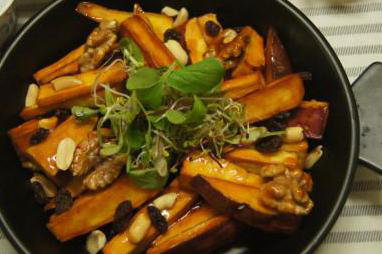

In [7]:
path = 'test_image0.jpg'

img1 = Image.open(path)

img1

In [46]:
95+382

389

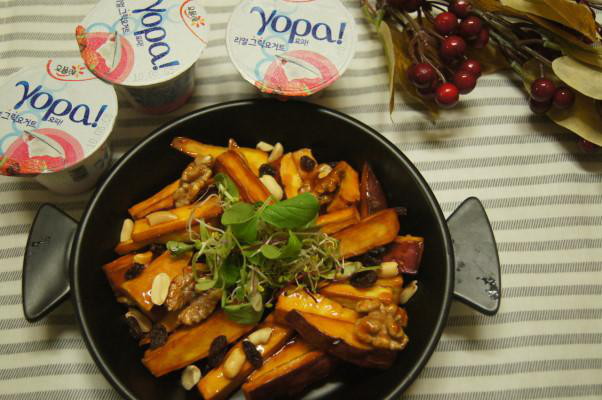

In [49]:
img

In [53]:
95+382

477

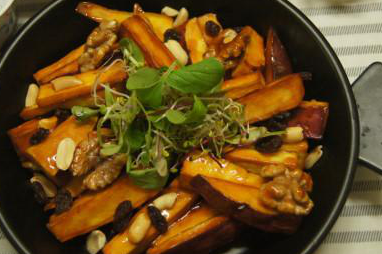

In [54]:
img.crop((95, 135, 477, 389))

In [ ]:
area = (가로시작점, 세로시작점, 가로범위, 세로범위)

crop_image = img.crop(area)

im.save # 저장하기

In [2]:
from PIL import Image

def crop_and_save(image_path, txt_path, output_dir):
    # 이미지 열기
    img = Image.open(image_path)
    
    # 텍스트 파일 열기
    with open(txt_path, 'r') as file:
        lines = file.readlines()
        
    for line in lines:
        # 각 줄에서 좌표와 레이블 파싱
        parts = line.strip().split(',')
        x1, y1, x2, y2 = map(int, parts[:4])
        label = parts[6].strip()
        
        # 이미지에서 해당 좌표에 해당하는 부분 잘라내기
        cropped_img = img.crop((x1, y1, x2, y2))
        
        # 잘라낸 이미지를 새 파일로 저장
        output_path = f"{output_dir}/{label}.jpg"
        cropped_img.save(output_path)
        print(f"Saved {output_path}")

# 이미지 파일 경로
image_path = 'multi_500/101_맛탕_multi/dki_10054964.jpg'

# 텍스트 파일 경로
txt_path = 'multi_500/101_맛탕_multi/dki_10054964.txt'

# 저장할 디렉토리 경로
output_dir = 'multi_500_nonmun'

# crop_and_save 함수 호출
crop_and_save(image_path, txt_path, output_dir)

SystemError: tile cannot extend outside image